# Introduction:
##### A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment.

##### This dataset designed to understand the factors that lead a person to leave current job. We will conduct Exploratory Data Analysis (EDA) to better understand the features in our dataset then we will apply MLP  and Perceptron Models  to predict whether the person wold join the company after traing or look for a new employment.



### Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate (To Data Science)
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

### Library Import

In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold, cross_val_score,learning_curve
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

#import scipy.stats as ss
#import os

### Data Load

In [632]:
train_data = pd.read_csv('Datasets/aug_train.csv')
test_data = pd.read_csv('Datasets/aug_test.csv')

In [633]:
#train_data.head()
print(train_data.head())

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

In [634]:
#train_data.info()
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [635]:
#train_data.describe()
print(train_data.describe())

        enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


### EDA - Exploratory Data Analysis


Number of features contains missing values

In [636]:
#train_data.isnull().sum()
print(train_data.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


Number of rows contains at least one missing value

In [637]:
x = train_data.dropna()
total = train_data.shape[0]
missing = x.shape[0]
print('Number of rows:' ,  missing )
print('Percentage of rows that contains missing values:', (missing ) *100 / total )

Number of rows: 8955
Percentage of rows that contains missing values: 46.74287503914814


The percentage of rows that contains missing values is very high so we can not drop these rows. The next table will display the missing value in each column and their percentage.


In [638]:
null = pd.DataFrame({'No of null values':train_data.isnull().sum(),'Percentage of null values':train_data.isnull().sum()*100/train_data.shape[0]})
#null
print(null)

                        No of null values  Percentage of null values
enrollee_id                             0                   0.000000
city                                    0                   0.000000
city_development_index                  0                   0.000000
gender                               4508                  23.530640
relevent_experience                     0                   0.000000
enrolled_university                   386                   2.014824
education_level                       460                   2.401086
major_discipline                     2813                  14.683161
experience                             65                   0.339284
company_size                         5938                  30.994885
company_type                         6140                  32.049274
last_new_job                          423                   2.207955
training_hours                          0                   0.000000
target                            

Columns that contain missing values

In [639]:
#null[null['No of null values'] > 0]
print(null[null['No of null values'] > 0])

                     No of null values  Percentage of null values
gender                            4508                  23.530640
enrolled_university                386                   2.014824
education_level                    460                   2.401086
major_discipline                  2813                  14.683161
experience                          65                   0.339284
company_size                      5938                  30.994885
company_type                      6140                  32.049274
last_new_job                       423                   2.207955


enrollee_id does not have duplicate ids, so it does not carry any semantic load, except for the candidate index, which should have been used as the index of the dataset, but I will not do it now 

In [640]:
#train_data['enrollee_id'].nunique() == train_data['enrollee_id'].count()
print(train_data['enrollee_id'].nunique() == train_data['enrollee_id'].count())

True


We are not interested in enrollee_id so we will drop it

In [641]:
train_data.drop(['enrollee_id'], axis = 1, inplace=True)
#train_data.shape
print(train_data.shape)

(19158, 13)


Divide categorical columns and numerical columns

In [642]:
cat_col = []
num_col = []
for col in train_data.columns:
    if train_data[col].dtype == object:
        print('category coloumn : ',col)
        cat_col.append(col)
    else:
        print('numarical column : ',col)
        num_col.append(col)

category coloumn :  city
numarical column :  city_development_index
category coloumn :  gender
category coloumn :  relevent_experience
category coloumn :  enrolled_university
category coloumn :  education_level
category coloumn :  major_discipline
category coloumn :  experience
category coloumn :  company_size
category coloumn :  company_type
category coloumn :  last_new_job
numarical column :  training_hours
numarical column :  target


In [643]:
# Check categorical Columns
#cat_col
print(cat_col)

['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [644]:
# Check numerical Columns
#num_col
print(num_col)

['city_development_index', 'training_hours', 'target']


In [645]:
# Check data in 'categorical columns'
#train_data[cat_col]
print(train_data[cat_col])

           city gender      relevent_experience enrolled_university  \
0      city_103   Male  Has relevent experience       no_enrollment   
1       city_40   Male   No relevent experience       no_enrollment   
2       city_21    NaN   No relevent experience    Full time course   
3      city_115    NaN   No relevent experience                 NaN   
4      city_162   Male  Has relevent experience       no_enrollment   
...         ...    ...                      ...                 ...   
19153  city_173   Male   No relevent experience       no_enrollment   
19154  city_103   Male  Has relevent experience       no_enrollment   
19155  city_103   Male  Has relevent experience       no_enrollment   
19156   city_65   Male  Has relevent experience       no_enrollment   
19157   city_67    NaN   No relevent experience       no_enrollment   

      education_level major_discipline experience company_size  \
0            Graduate             STEM        >20          NaN   
1            Gr

We can see that our dataset contains 19158 entries and 14 columns. We have 4 numerical variables and 10 categorical variables


In [646]:
print(train_data.shape)
#print(train_data['city'].unique())
print(train_data['gender'].unique())
print(train_data['relevent_experience'].unique())
print(train_data['enrolled_university'].unique())
print(train_data['education_level'].unique())
print(train_data['major_discipline'].unique())
print(train_data['experience'].unique())
print(train_data['company_size'].unique())
print(train_data['company_type'].unique())
print(train_data['last_new_job'].unique())

(19158, 13)
['Male' nan 'Female' 'Other']
['Has relevent experience' 'No relevent experience']
['no_enrollment' 'Full time course' nan 'Part time course']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
['1' '>4' 'never' '4' '3' '2' nan]


Distribution of Variables

<Axes: xlabel='target', ylabel='count'>

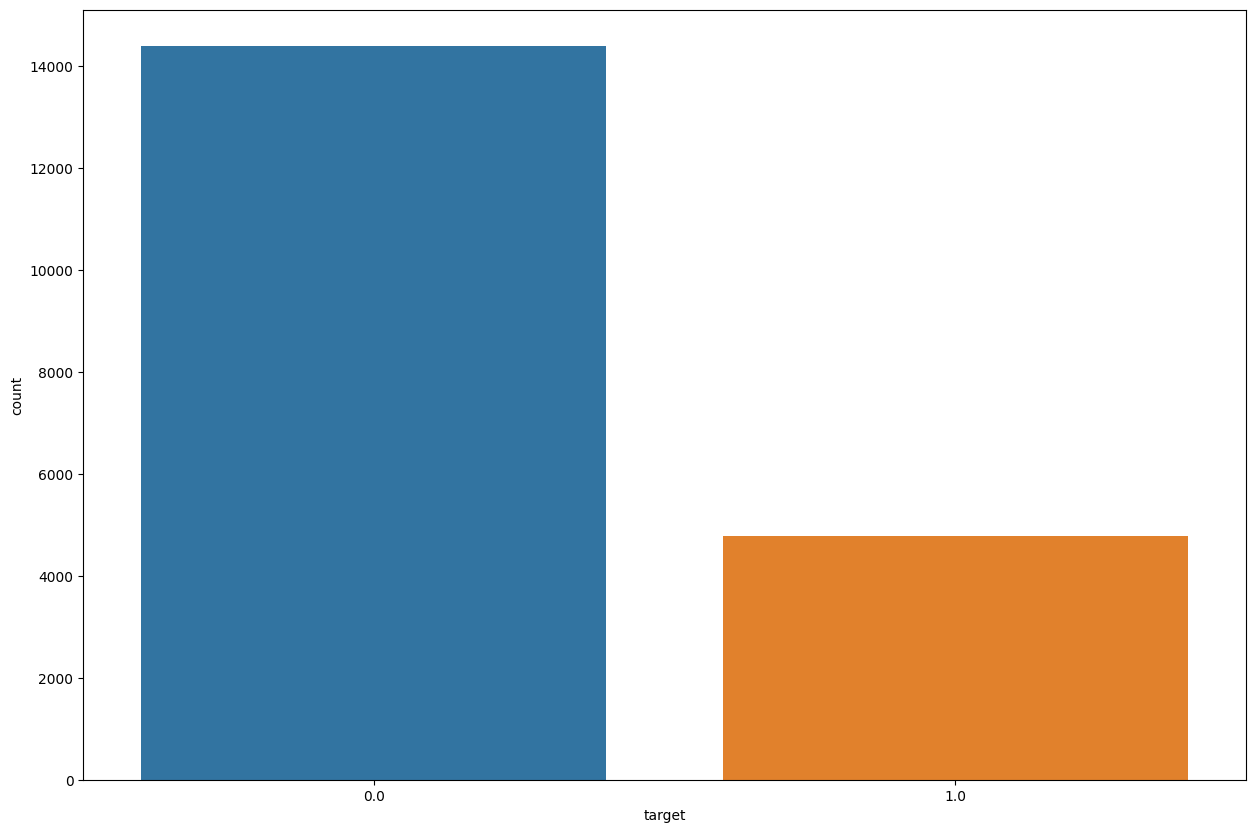

In [647]:
#There is a strong imbalance of the target attribute 1:4

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='target')

target
0.0    14381
1.0     4777
Name: count, dtype: int64


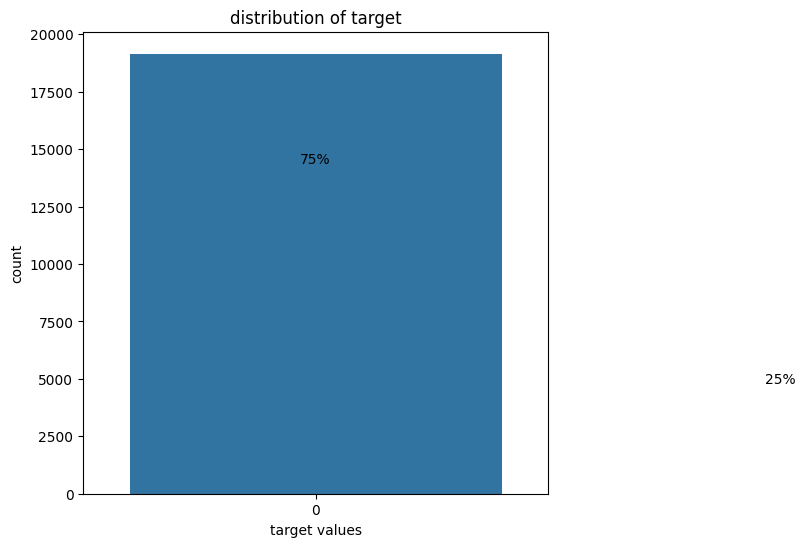

In [648]:
count = train_data.target.value_counts()
print( count )
plt.figure(figsize = (6,6))
sns.countplot(train_data.target,color = sns.color_palette()[0])
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /train_data.target.count()))+'%',
              ha='center',
              va = 'top')

In [649]:
round(train_data['target'].value_counts(normalize=True)*100)
print(round(train_data['target'].value_counts(normalize=True)*100))

target
0.0    75.0
1.0    25.0
Name: proportion, dtype: float64


<Axes: xlabel='city_development_index', ylabel='Count'>

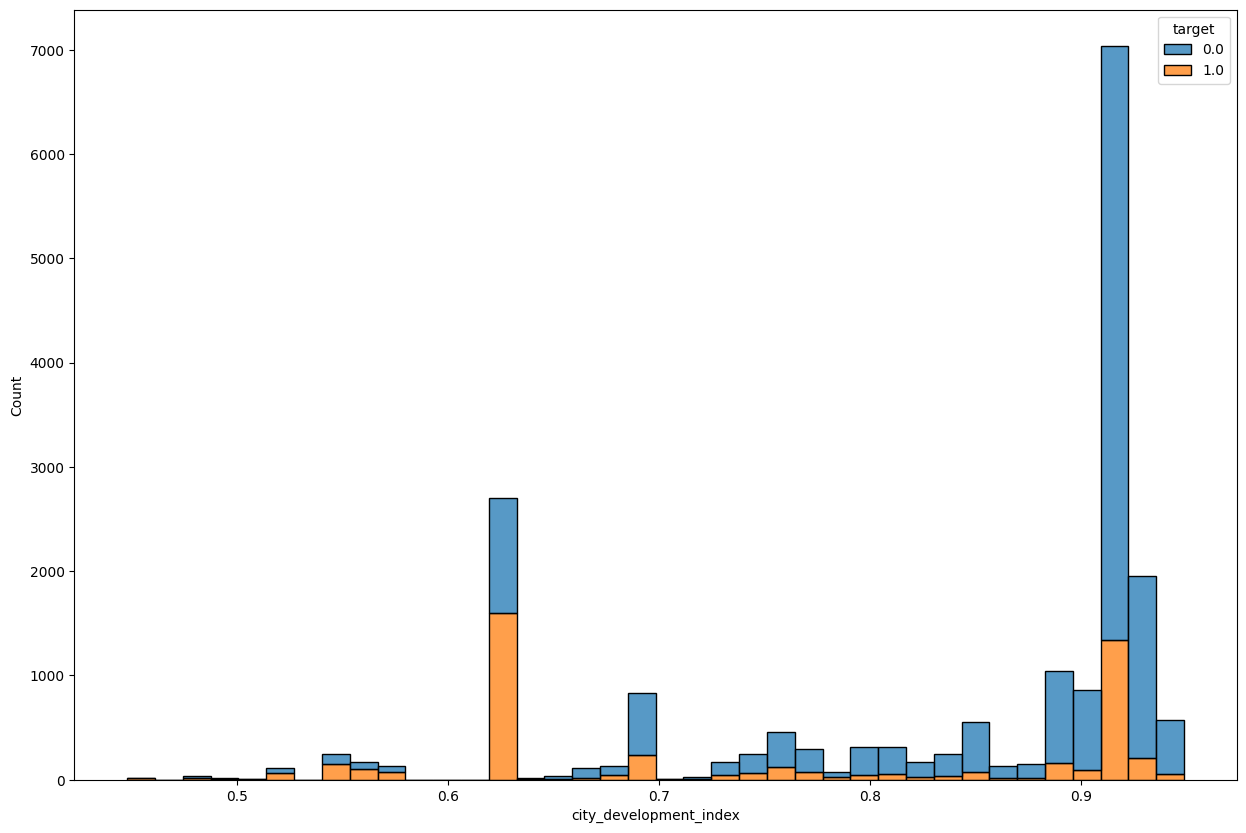

In [650]:
#target = 1 is more common in city_development_index < 0.65 

plt.figure(figsize=(15,10))
sns.histplot(data=train_data, x='city_development_index', hue='target', multiple="stack")

<Axes: >

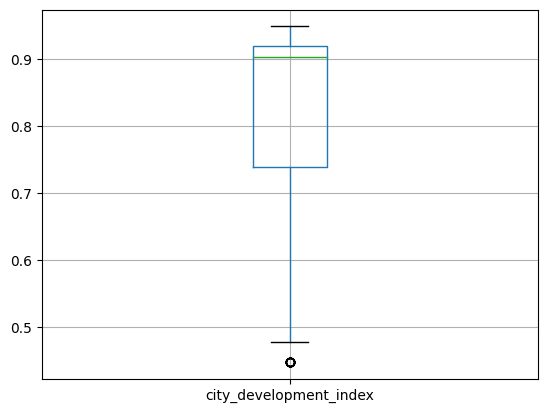

In [651]:
train_data[['city_development_index']].boxplot()

<Axes: xlabel='training_hours', ylabel='Count'>

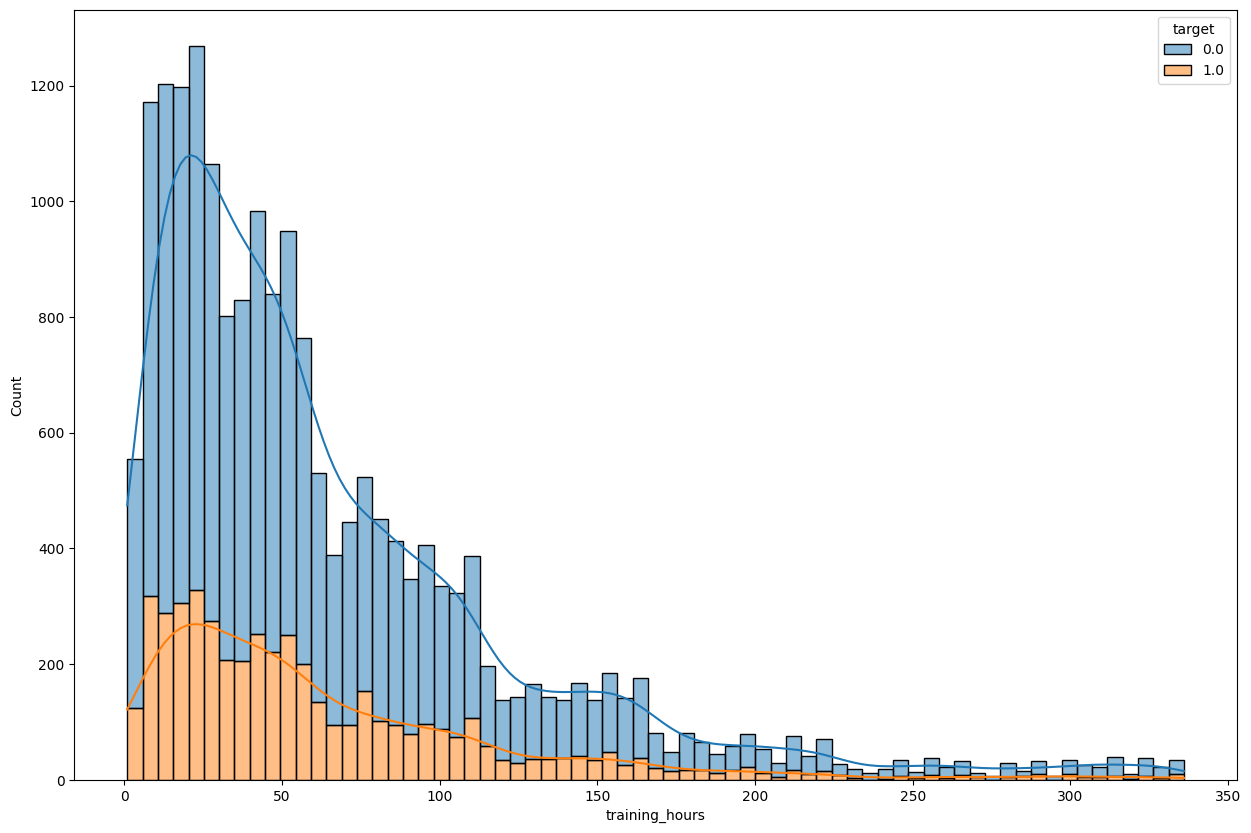

In [652]:
#Less than 200 candidates studied for more than 110 hours
#Due to the target imbalance, it can be assumed that the target attribute is distributed equally and training_hours does not have a strong influence

plt.figure(figsize=(15,10))
sns.histplot(data=train_data, x='training_hours', hue='target', multiple="stack", kde=True)

<Axes: >

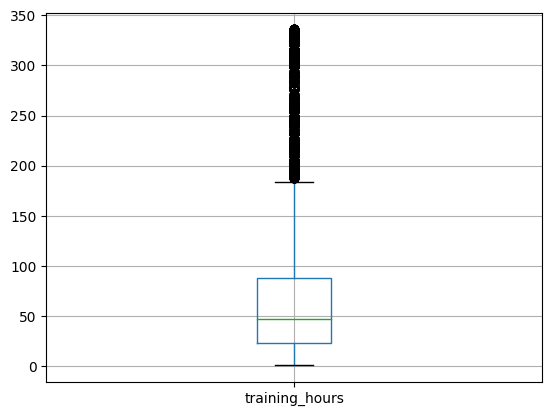

In [653]:
train_data[['training_hours']].boxplot()

In [654]:
check_city = train_data['city'].value_counts().head(10)
#check_city
print(check_city)

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
Name: count, dtype: int64


<Axes: xlabel='city', ylabel='count'>

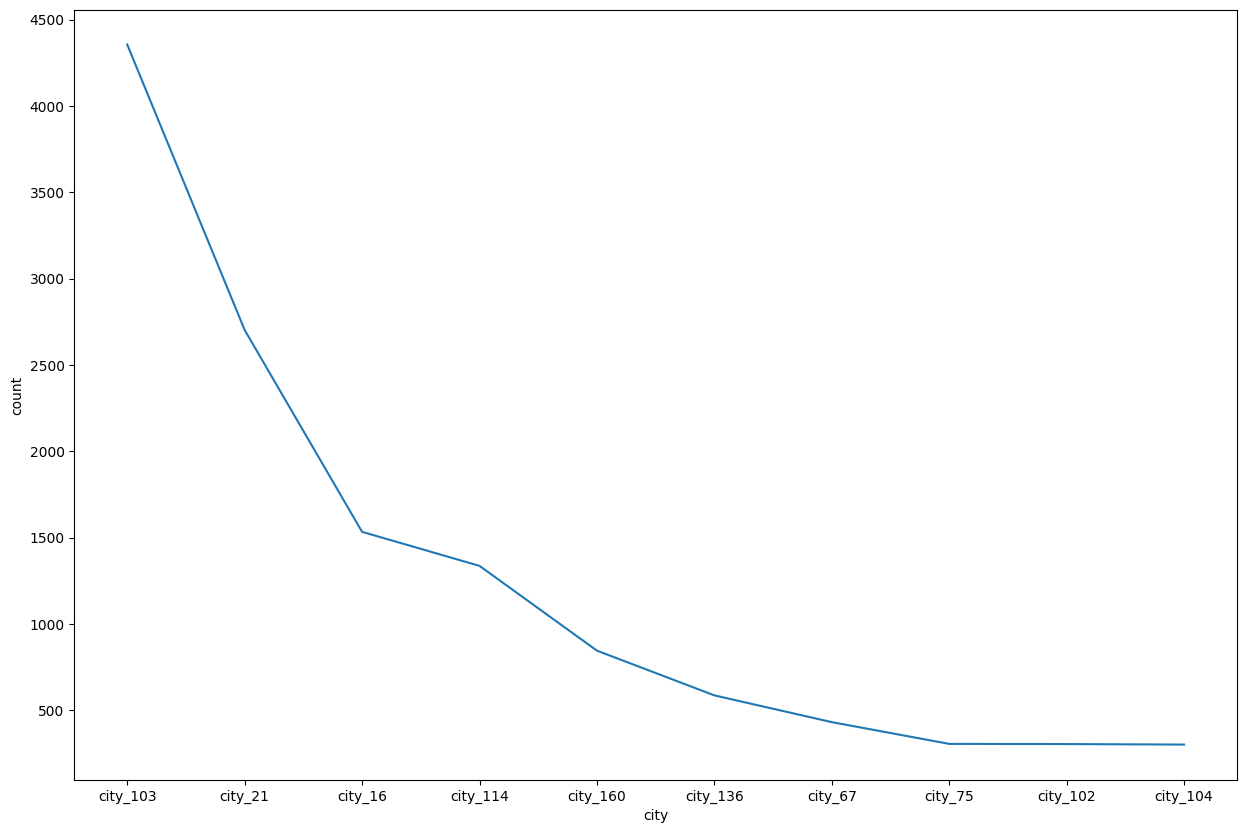

In [655]:
#Most of the candidates are from 7 major cities

plt.figure(figsize=(15,10))
sns.lineplot(data=check_city)

In [656]:
train_data['city'] = train_data['city'].apply(lambda x: int(x.replace('city_','')))

<Axes: xlabel='city', ylabel='Count'>

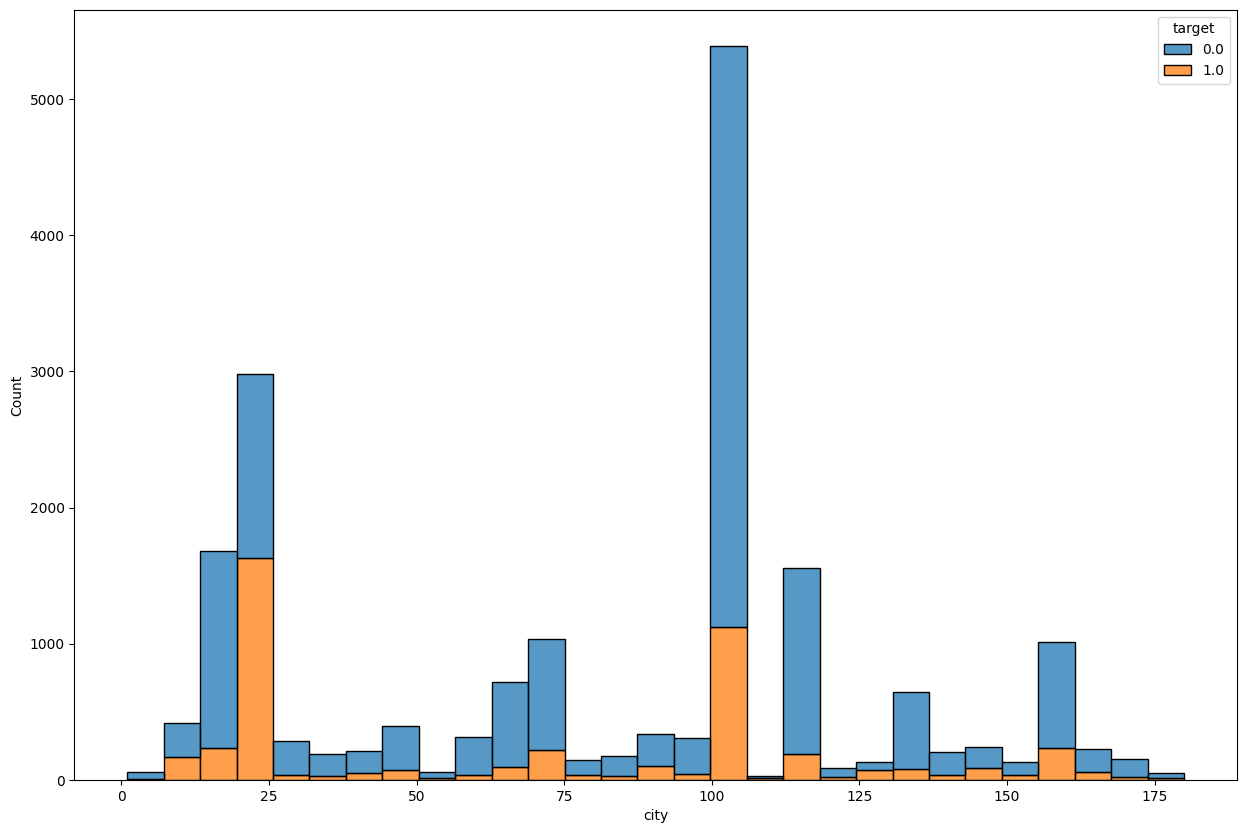

In [657]:
plt.figure(figsize=(15,10))
sns.histplot(x=train_data.city ,hue=train_data.target, multiple="stack")

<Axes: xlabel='gender', ylabel='count'>

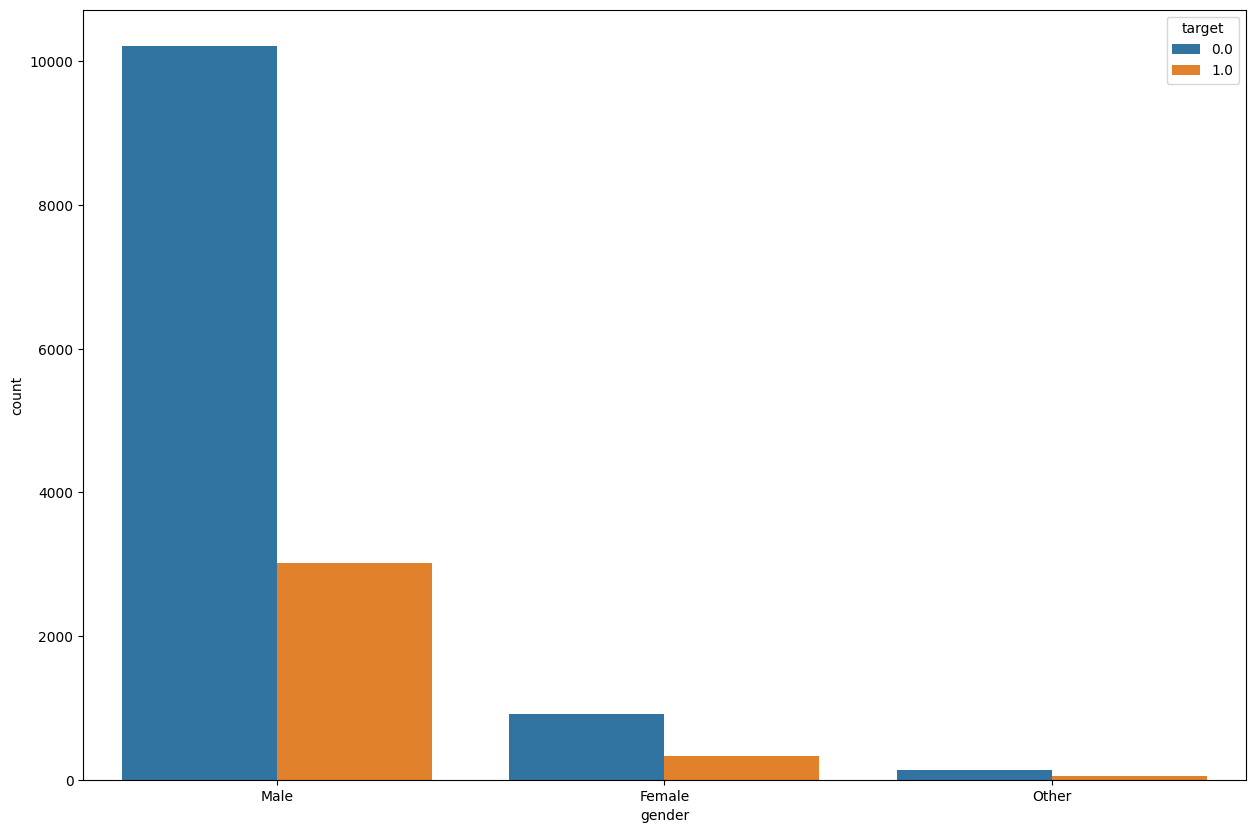

In [658]:
#Male objects are observed much more than the rest

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='gender', hue='target')

In [659]:
#train_data['relevent_experience'].value_counts()
print(train_data['relevent_experience'].value_counts())

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64


<Axes: xlabel='relevent_experience', ylabel='count'>

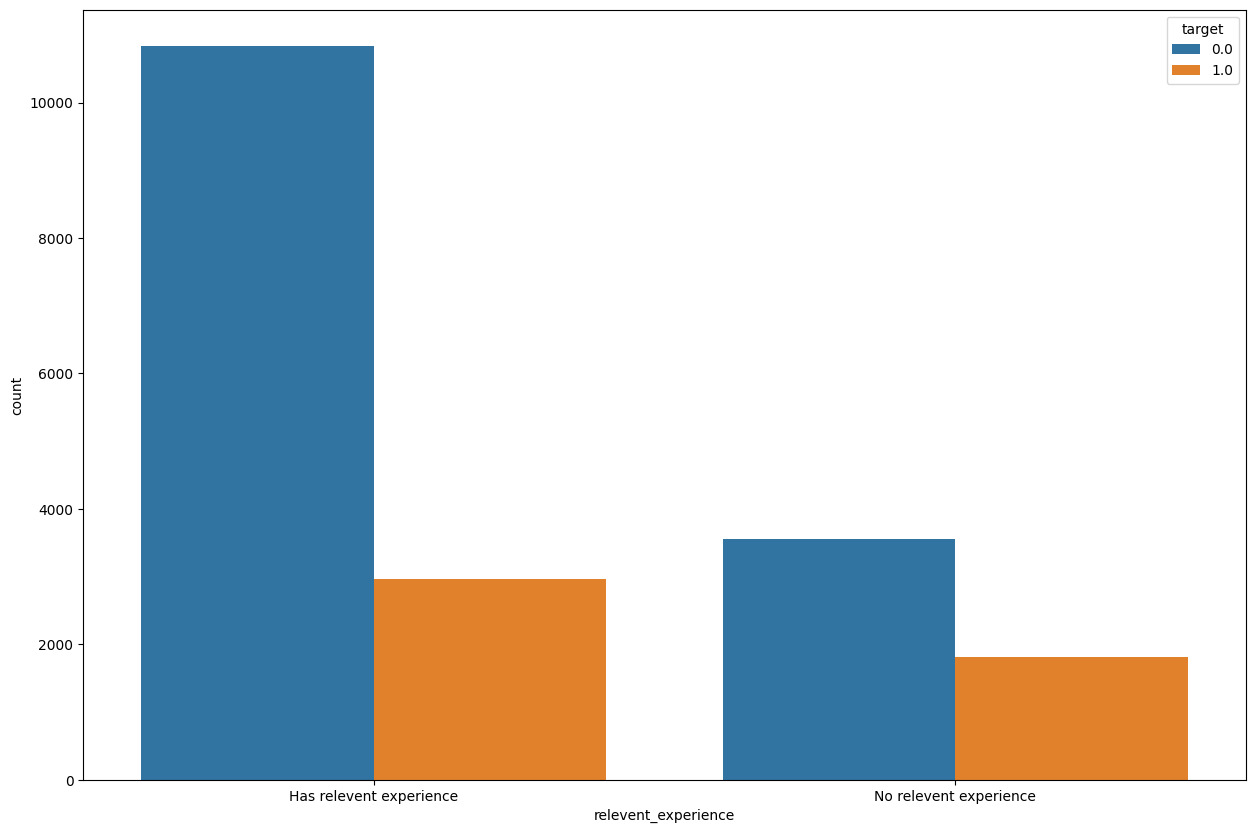

In [660]:
#People with the relevent experience are more likely to be looking for a job 

plt.figure(figsize=(15,10))
sns.countplot(x=train_data.relevent_experience, hue=train_data.target)

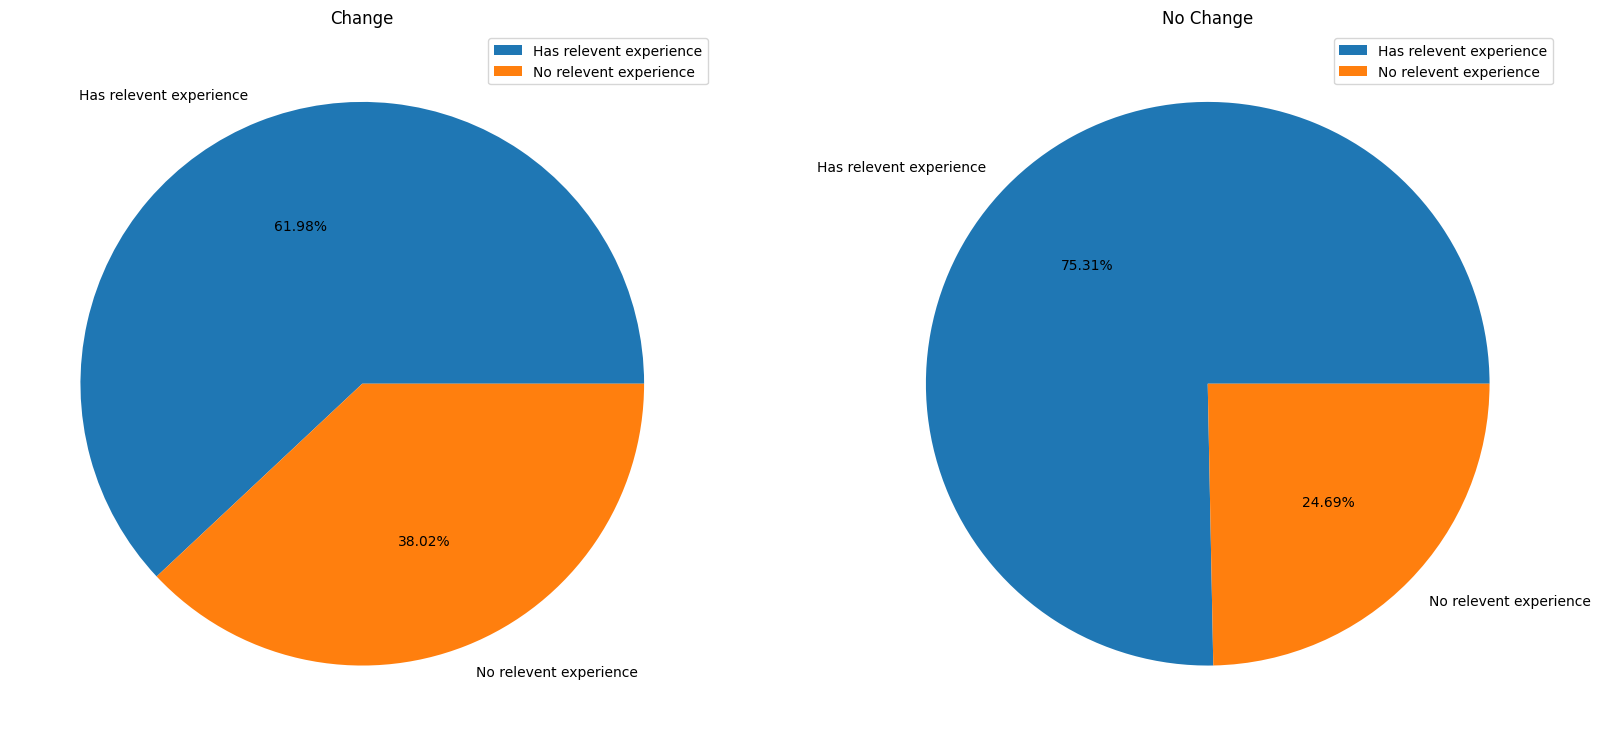

In [661]:
change = train_data[train_data.target == 1].relevent_experience.value_counts()
no_change = train_data[train_data.target == 0].relevent_experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

In [662]:
#train_data['enrolled_university'].unique()
print(train_data['enrolled_university'].unique())

['no_enrollment' 'Full time course' nan 'Part time course']


<Axes: xlabel='enrolled_university', ylabel='count'>

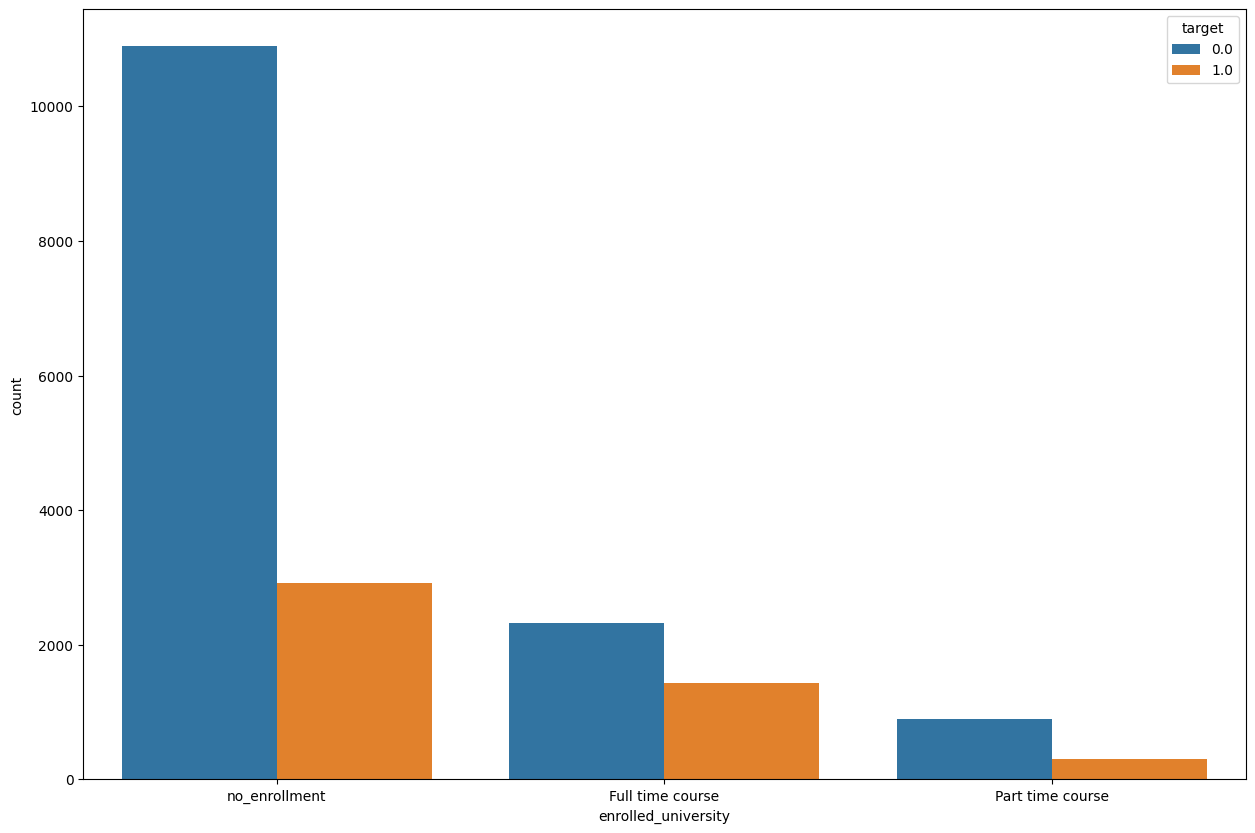

In [663]:
#Candidates who have completed full time course are more likely to look for a new job

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='enrolled_university', hue='target')

/Users/mac/Documents/GitHub/HRAnalyticsJobChangeDataScientists/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


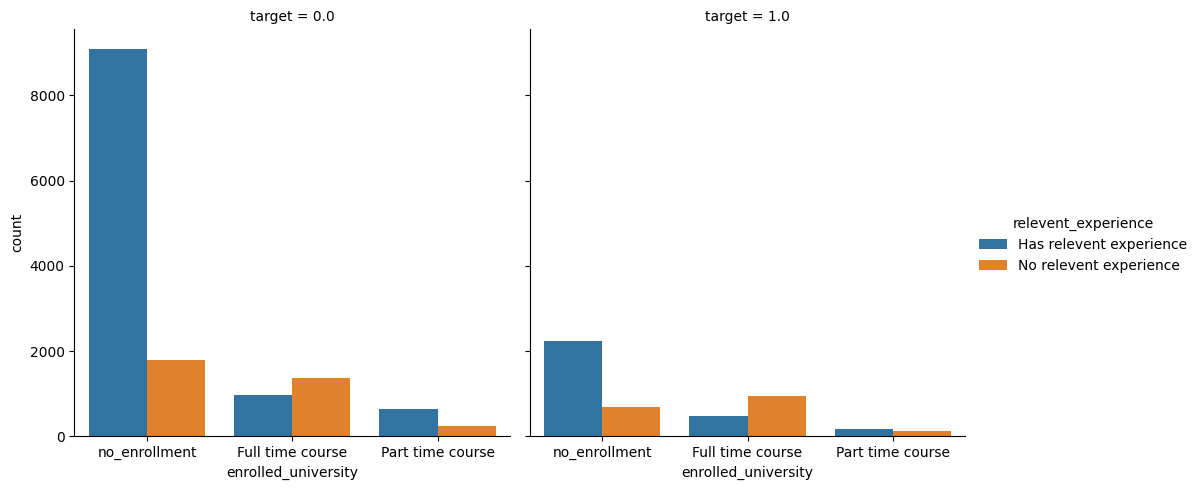

In [664]:
#Candidates who have no relevent experience but have completed full-time course are more likely to look for a job than candidates who have relevent experience and have completed full-time course

sns.catplot(data=train_data, x='enrolled_university', hue='relevent_experience', col='target', kind='count', height=5)

In [665]:
#train_data['education_level'].unique()
print(train_data['education_level'].unique())

['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']


<Axes: xlabel='education_level', ylabel='count'>

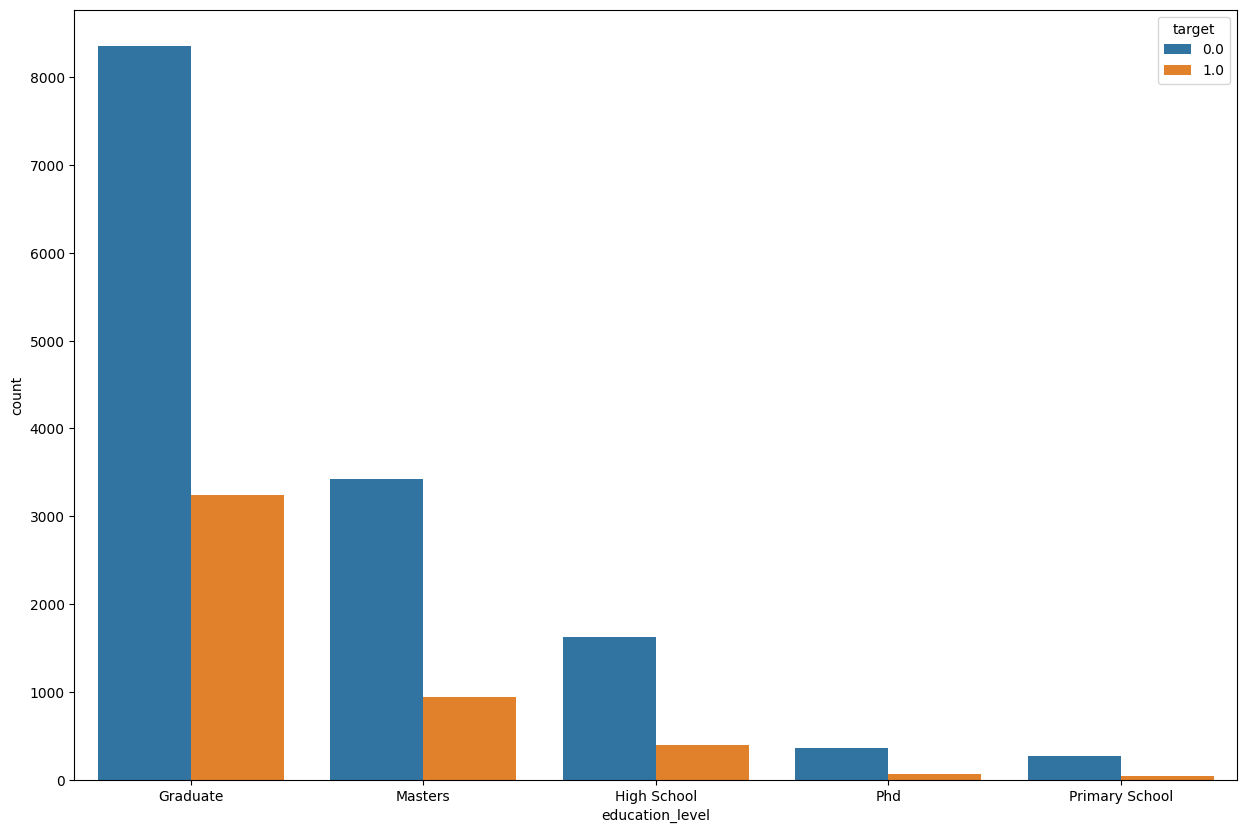

In [666]:
#A natural situation, Graduate are most often in search of work

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='education_level', hue='target')

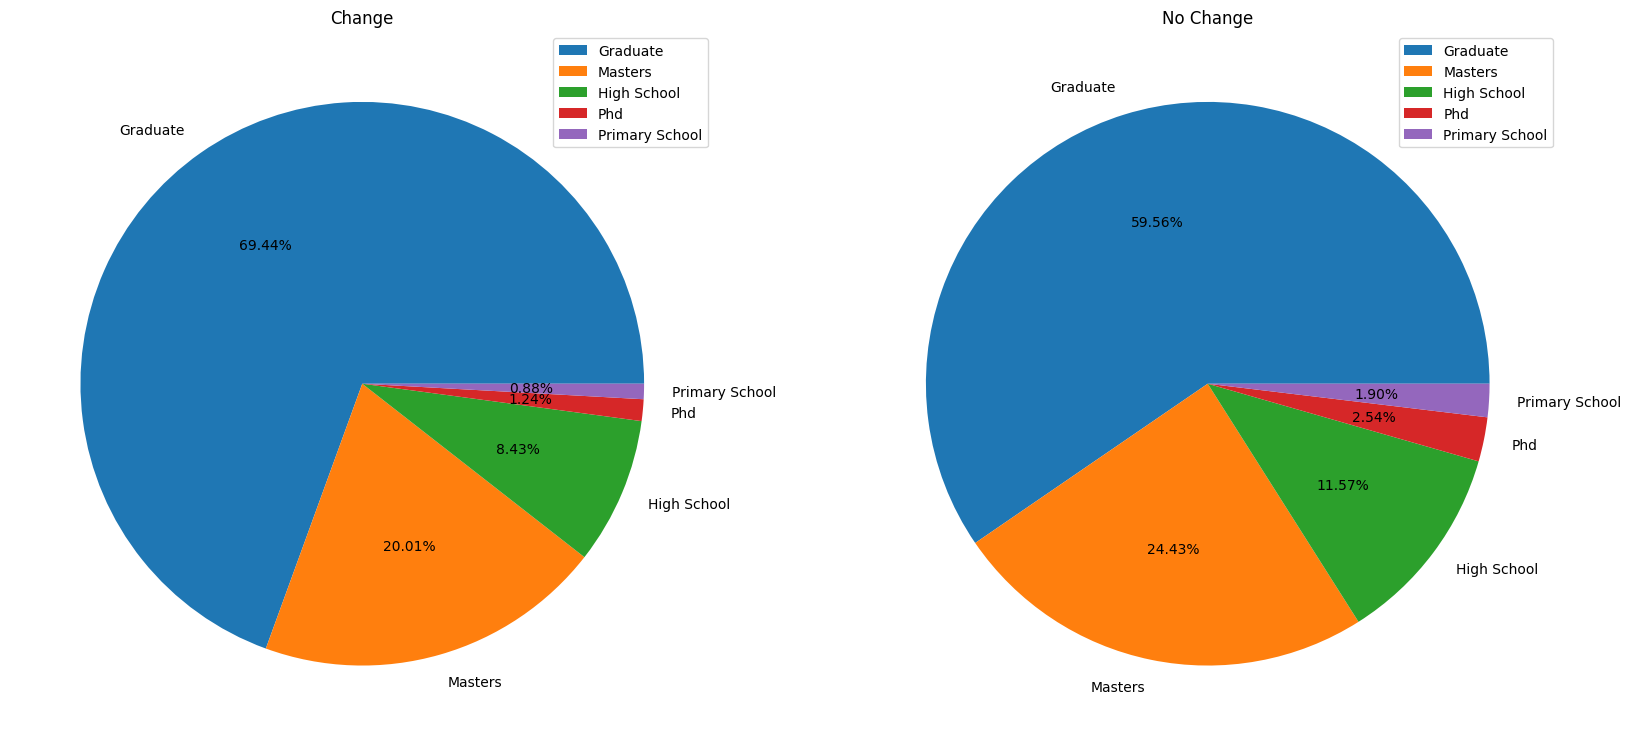

In [667]:
change = train_data[train_data.target == 1].education_level.value_counts()
no_change = train_data[train_data.target == 0].education_level.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

In [668]:
#Most of the candidates in the sample with the STEM 

#train_data['major_discipline'].value_counts()
print(train_data['major_discipline'].value_counts())

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64


<Axes: xlabel='major_discipline', ylabel='count'>

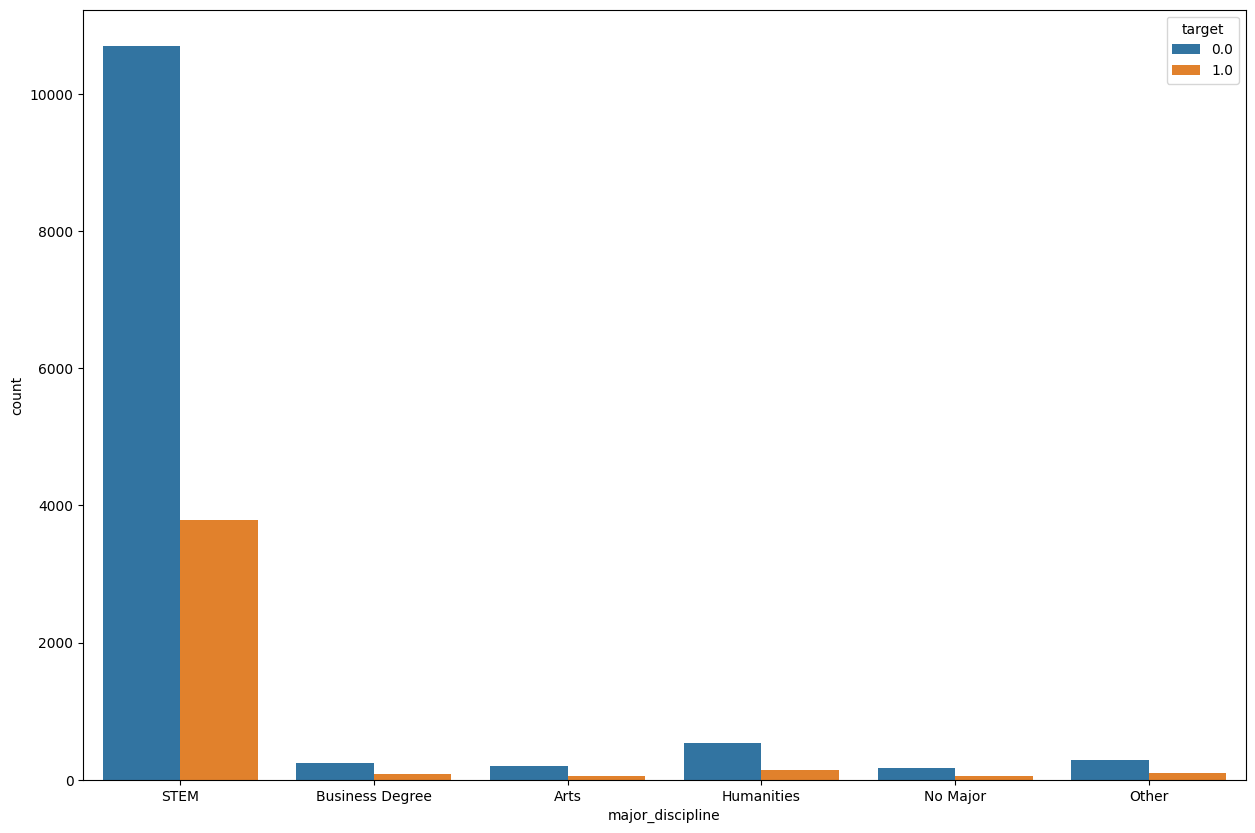

In [669]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='major_discipline', hue='target')

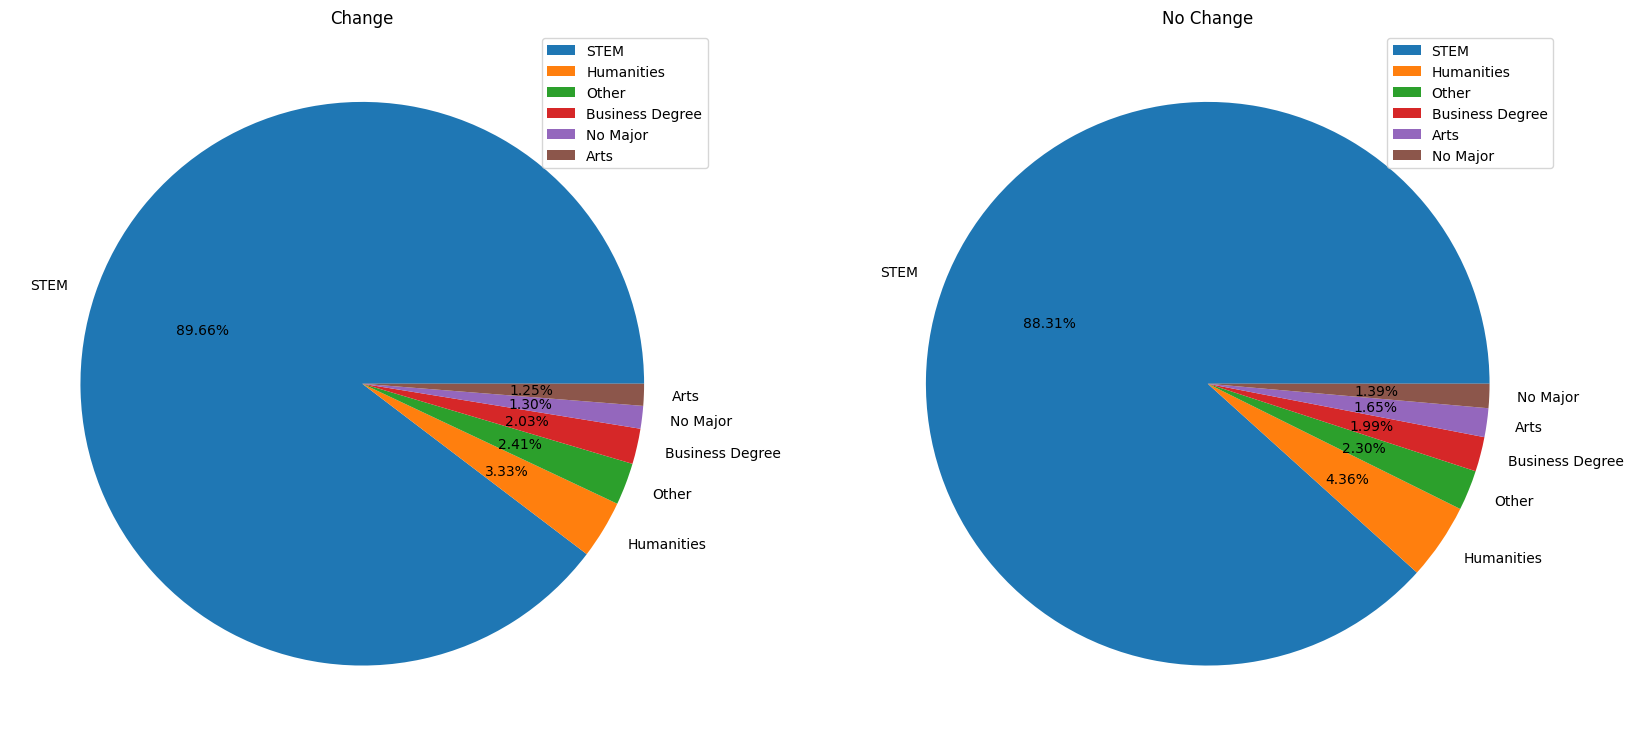

In [670]:
change = train_data[train_data.target == 1].major_discipline.value_counts()
no_change = train_data[train_data.target == 0].major_discipline.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

In [671]:
print('unique values:', * train_data['experience'].unique(),'\n\n count unique values:', train_data['experience'].nunique())

unique values: >20 15 5 <1 11 13 7 17 2 16 1 4 10 14 18 19 12 3 6 9 8 20 nan 

 count unique values: 22


In [672]:
#train_data['experience'].value_counts()
print(train_data['experience'].value_counts())

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64


<Axes: xlabel='experience', ylabel='count'>

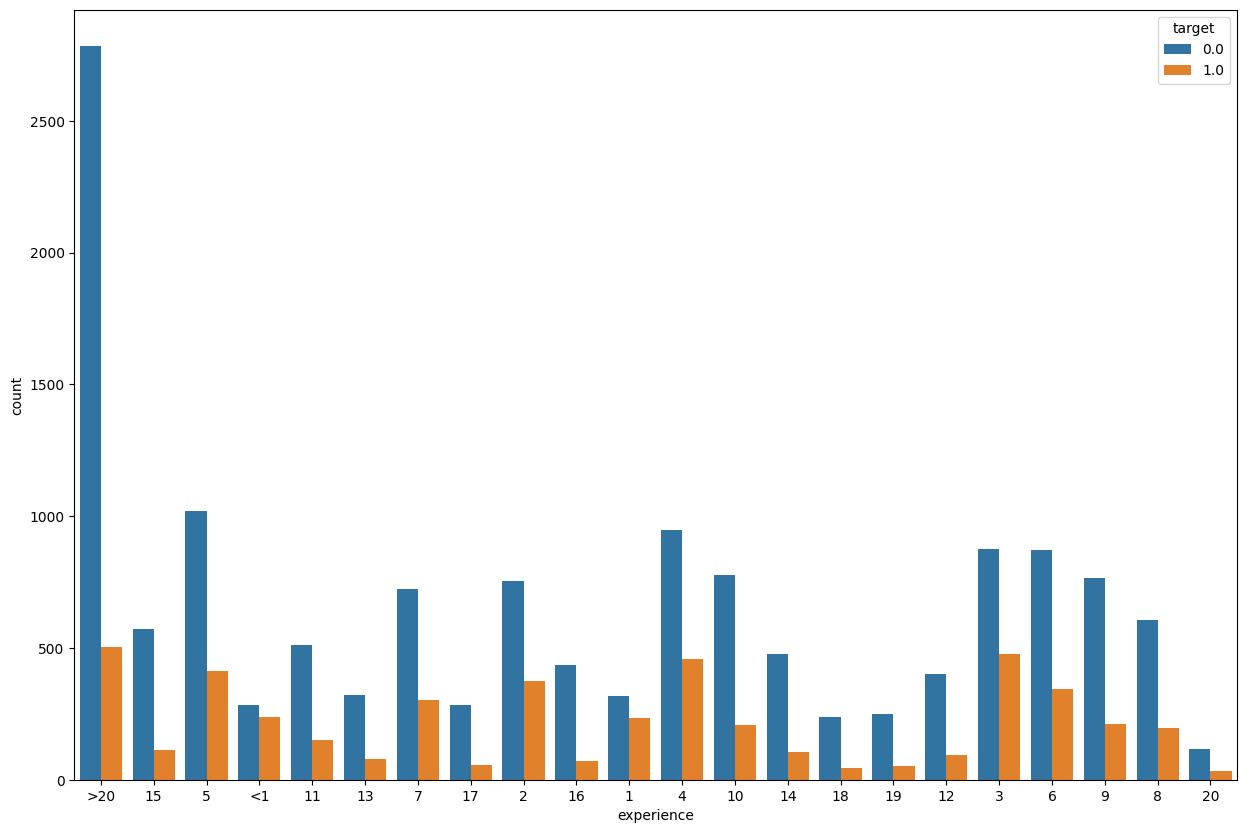

In [673]:
#Candidates who have worked for more than 20 years are most often found in the sample 
#Candidates with experience = (24) are most often looking for a new job

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='experience', hue='target')

<Axes: xlabel='experience', ylabel='count'>

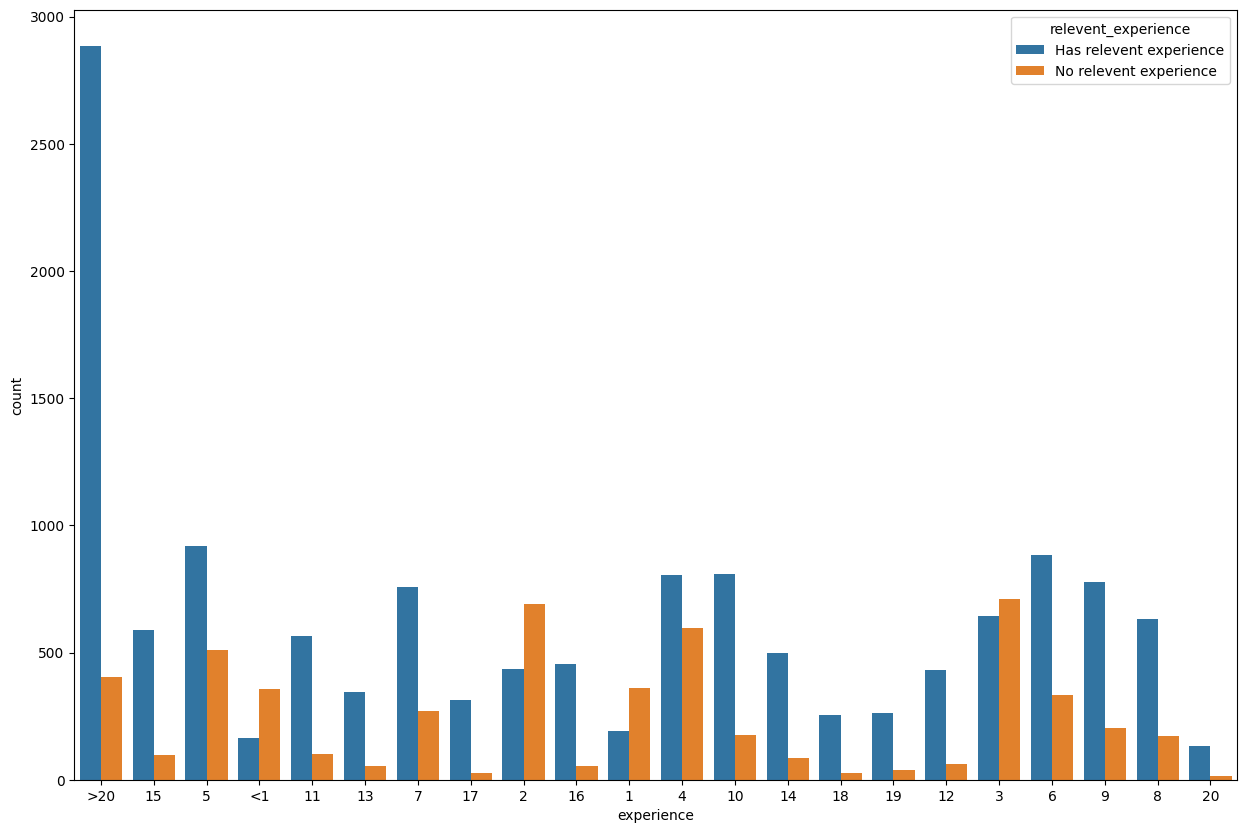

In [674]:
#At first I thought that having experience, we don't need relevant_experience, since they repeat each other, but no. Apparently, experience implies the GENERAL experience of the candidate, and not the experience in the field of search

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='experience', hue='relevent_experience')

In [675]:
#train_data['company_size'].value_counts()
print(train_data['company_size'].value_counts())

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64


<Axes: xlabel='company_size', ylabel='count'>

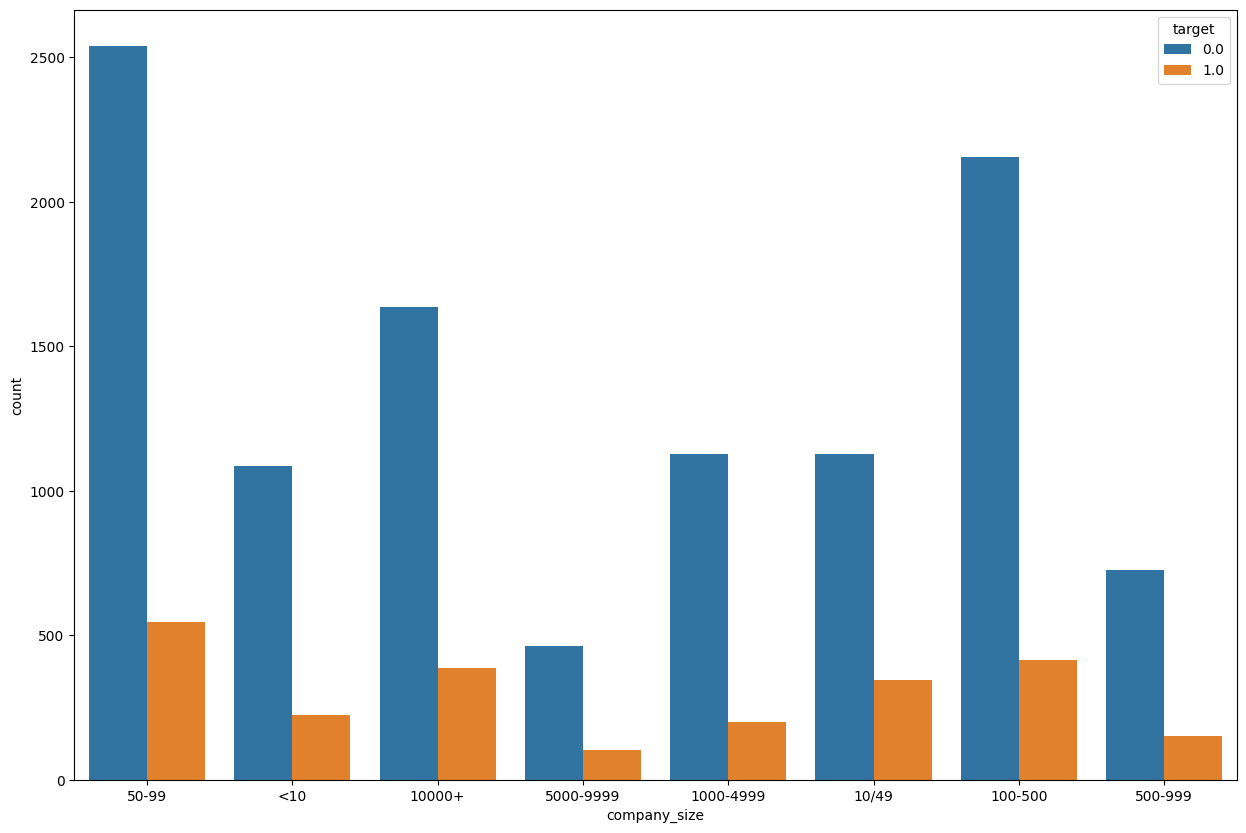

In [676]:
#The size of the company doesn't seem to have much effect on the target variable 

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='company_size', hue='target')

In [677]:
#train_data['company_type'].value_counts()
print(train_data['company_type'].value_counts())

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64


<Axes: xlabel='company_type', ylabel='count'>

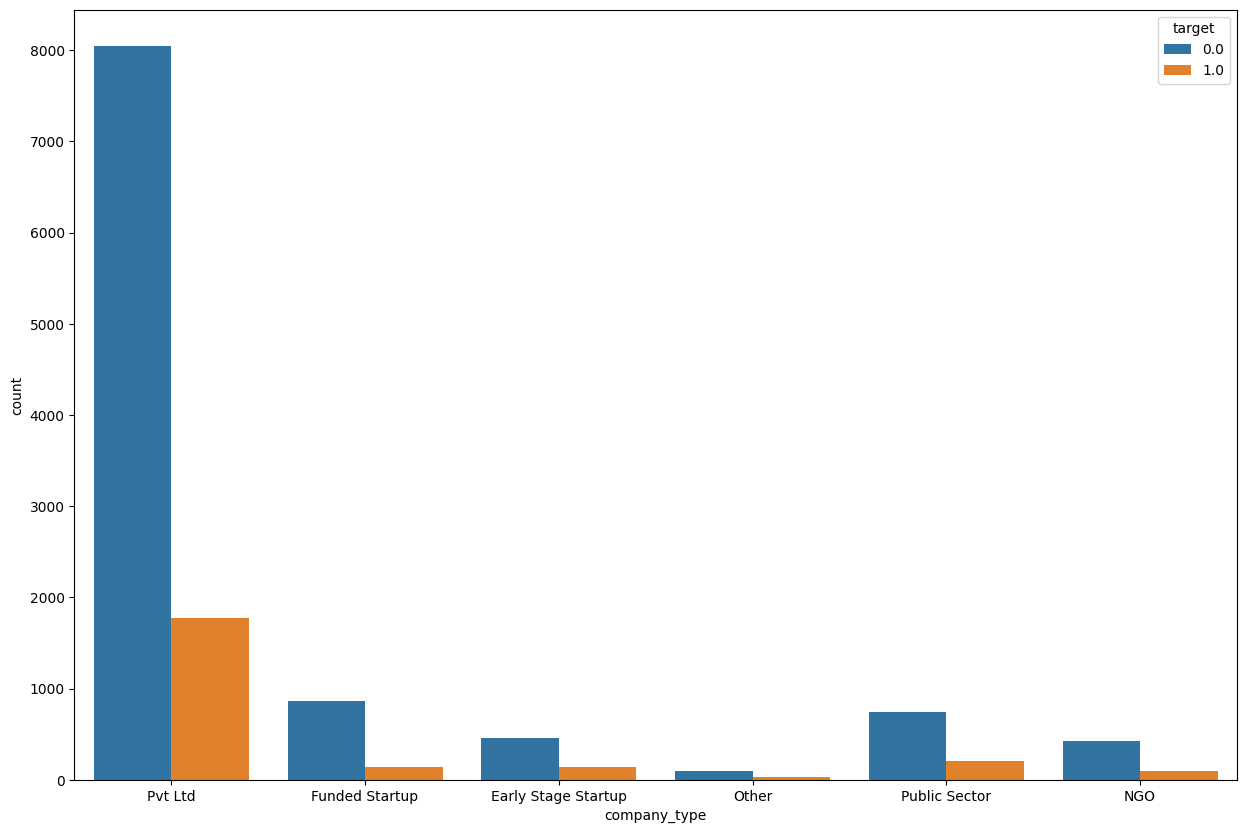

In [678]:
#The type of company doesn't seem to have much effect on the target variable

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='company_type', hue='target')

In [679]:
#train_data['last_new_job'].value_counts()
print(train_data['last_new_job'].value_counts())

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64


<Axes: xlabel='last_new_job', ylabel='count'>

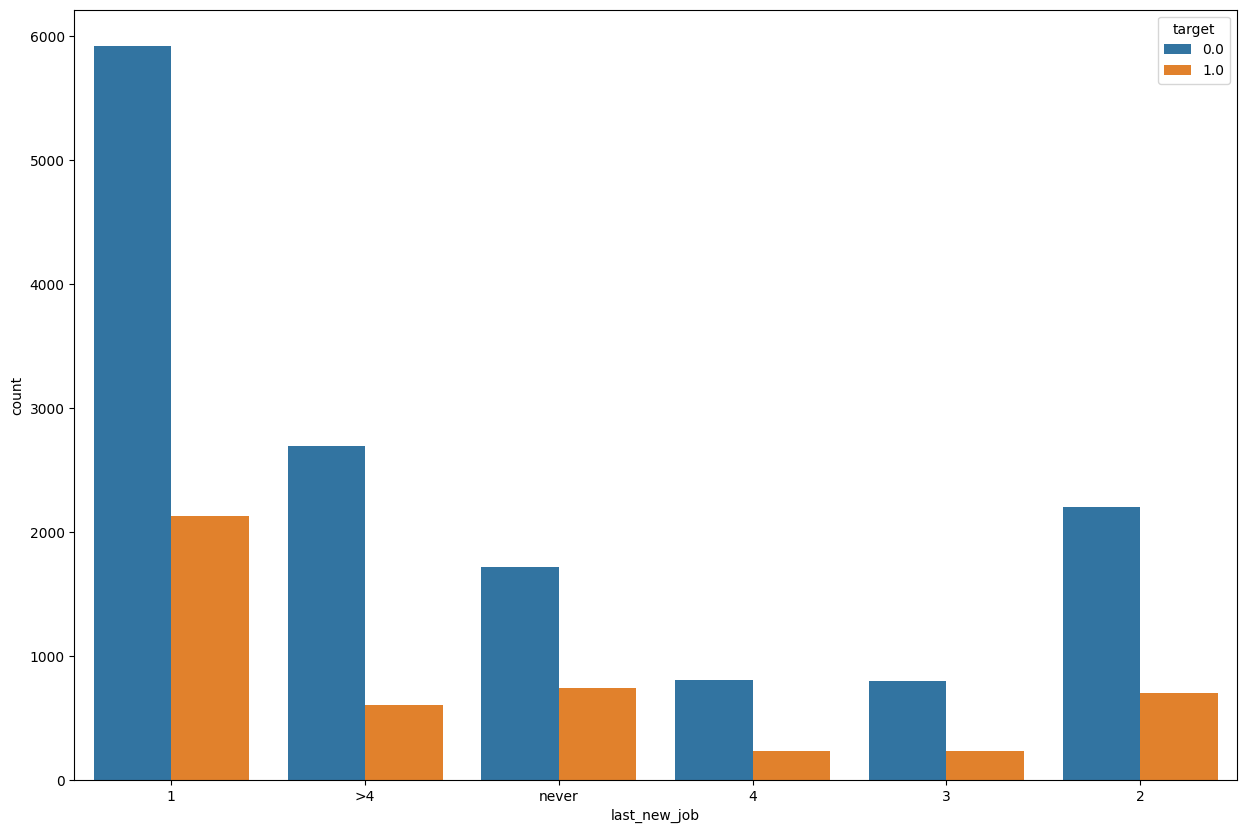

In [680]:
#Most often, people are looking for a job with little or no work experience at all

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='last_new_job', hue='target')

Transformaciones e inputaciones de NaN

In [681]:
#train_data.isnull().sum()
print(train_data.isnull().sum())

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [682]:
train_data = train_data.dropna()


In [683]:
train_data.drop(['city_development_index'], axis = 1, inplace=True)

train_data['company_size'] = train_data['company_size'].replace('10/49', '10-49')
train_data['company_size'].value_counts()

#train_data.gender = train_data.gender.fillna('Unidentified') 

train_data.enrolled_university = train_data.enrolled_university.fillna('No Data') 

train_data.education_level = train_data.education_level.fillna('No Data') 

train_data.major_discipline = train_data.major_discipline.fillna('No Data') 

train_data.experience = train_data.experience.fillna('<1') 

train_data['experience'].replace({'1':'1-5',
                                '2':'1-5',
                                '3':'1-5',
                                '4':'1-5',
                                '5':'1-5',
                                '6':'6-10',
                                '7':'6-10',
                                '8':'6-10',
                                '9':'6-10',
                                '10':'6-10',
                                '11':'11-15',
                                '12':'11-15',
                                '13':'11-15',
                                '14':'11-15',
                                '15':'11-15',
                                '16':'16-20',
                                '17':'16-20',
                                '18':'16-20',
                                '19':'16-20',
                                '20':'16-20'},inplace=True)

train_data.company_size = train_data.company_size.fillna('No Data') 

train_data.company_type = train_data.company_type.fillna('No Data') 

train_data.last_new_job = train_data.last_new_job.fillna('No Data') 

train_data = train_data.dropna()


/var/folders/z2/yrmhprfn28q8_qwgq1bkvnfc0000gn/T/ipykernel_9489/1837157788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['city_development_index'], axis = 1, inplace=True)
/var/folders/z2/yrmhprfn28q8_qwgq1bkvnfc0000gn/T/ipykernel_9489/1837157788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['company_size'] = train_data['company_size'].replace('10/49', '10-49')
/var/folders/z2/yrmhprfn28q8_qwgq1bkvnfc0000gn/T/ipykernel_9489/1837157788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [684]:
#train_data.isnull().sum()
print(train_data.isnull().sum())

city                   0
gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
training_hours         0
target                 0
dtype: int64


In [685]:
# divide categorical columns and numerical columns
cat_col = []
num_col = []
for col in train_data.columns:
    if train_data[col].dtype == object:
        print('category coloumn : ',col)
        cat_col.append(col)
    else:
        print('numarical column : ',col)
        num_col.append(col)

numarical column :  city
category coloumn :  gender
category coloumn :  relevent_experience
category coloumn :  enrolled_university
category coloumn :  education_level
category coloumn :  major_discipline
category coloumn :  experience
category coloumn :  company_size
category coloumn :  company_type
category coloumn :  last_new_job
numarical column :  training_hours
numarical column :  target


In [686]:
#train_data
print(train_data)

       city  gender      relevent_experience enrolled_university  \
1        40    Male   No relevent experience       no_enrollment   
4       162    Male  Has relevent experience       no_enrollment   
7        46    Male  Has relevent experience       no_enrollment   
8       103    Male  Has relevent experience       no_enrollment   
11      103    Male  Has relevent experience       no_enrollment   
...     ...     ...                      ...                 ...   
19147    21    Male   No relevent experience    Full time course   
19149   103    Male  Has relevent experience       no_enrollment   
19150   160  Female  Has relevent experience       no_enrollment   
19152   103  Female  Has relevent experience       no_enrollment   
19155   103    Male  Has relevent experience       no_enrollment   

      education_level major_discipline experience company_size  \
1            Graduate             STEM      11-15        50-99   
4             Masters             STEM        >20  

In [687]:
to_LabelEncode = train_data[cat_col]

le = LabelEncoder()
df_temp = to_LabelEncode.astype("str").apply(le.fit_transform)
df_temp = df_temp.where(~to_LabelEncode.isna(), to_LabelEncode)

df_encod = df_temp.join(train_data[num_col])

#df_encod.shape
print(df_encod.shape)

(8955, 12)


In [688]:
#df_encod
print(df_encod)

       gender  relevent_experience  enrolled_university  education_level  \
1           1                    1                    2                0   
4           1                    0                    2                1   
7           1                    0                    2                0   
8           1                    0                    2                0   
11          1                    0                    2                0   
...       ...                  ...                  ...              ...   
19147       1                    1                    0                0   
19149       1                    0                    2                1   
19150       0                    0                    2                0   
19152       0                    0                    2                0   
19155       1                    0                    2                0   

       major_discipline  experience  company_size  company_type  last_new_job  \
1     

In [689]:
#train_data_OHE = pd.get_dummies(data=train_data, columns=cat_col, drop_first=False) 
#train_data_OHE

In [690]:
#train_data[num_col]
print(train_data[num_col])

       city  training_hours  target
1        40              47     0.0
4       162               8     0.0
7        46              18     1.0
8       103              46     1.0
11      103             108     0.0
...     ...             ...     ...
19147    21              52     1.0
19149   103              36     1.0
19150   160              23     0.0
19152   103              25     0.0
19155   103              44     0.0

[8955 rows x 3 columns]


<Axes: >

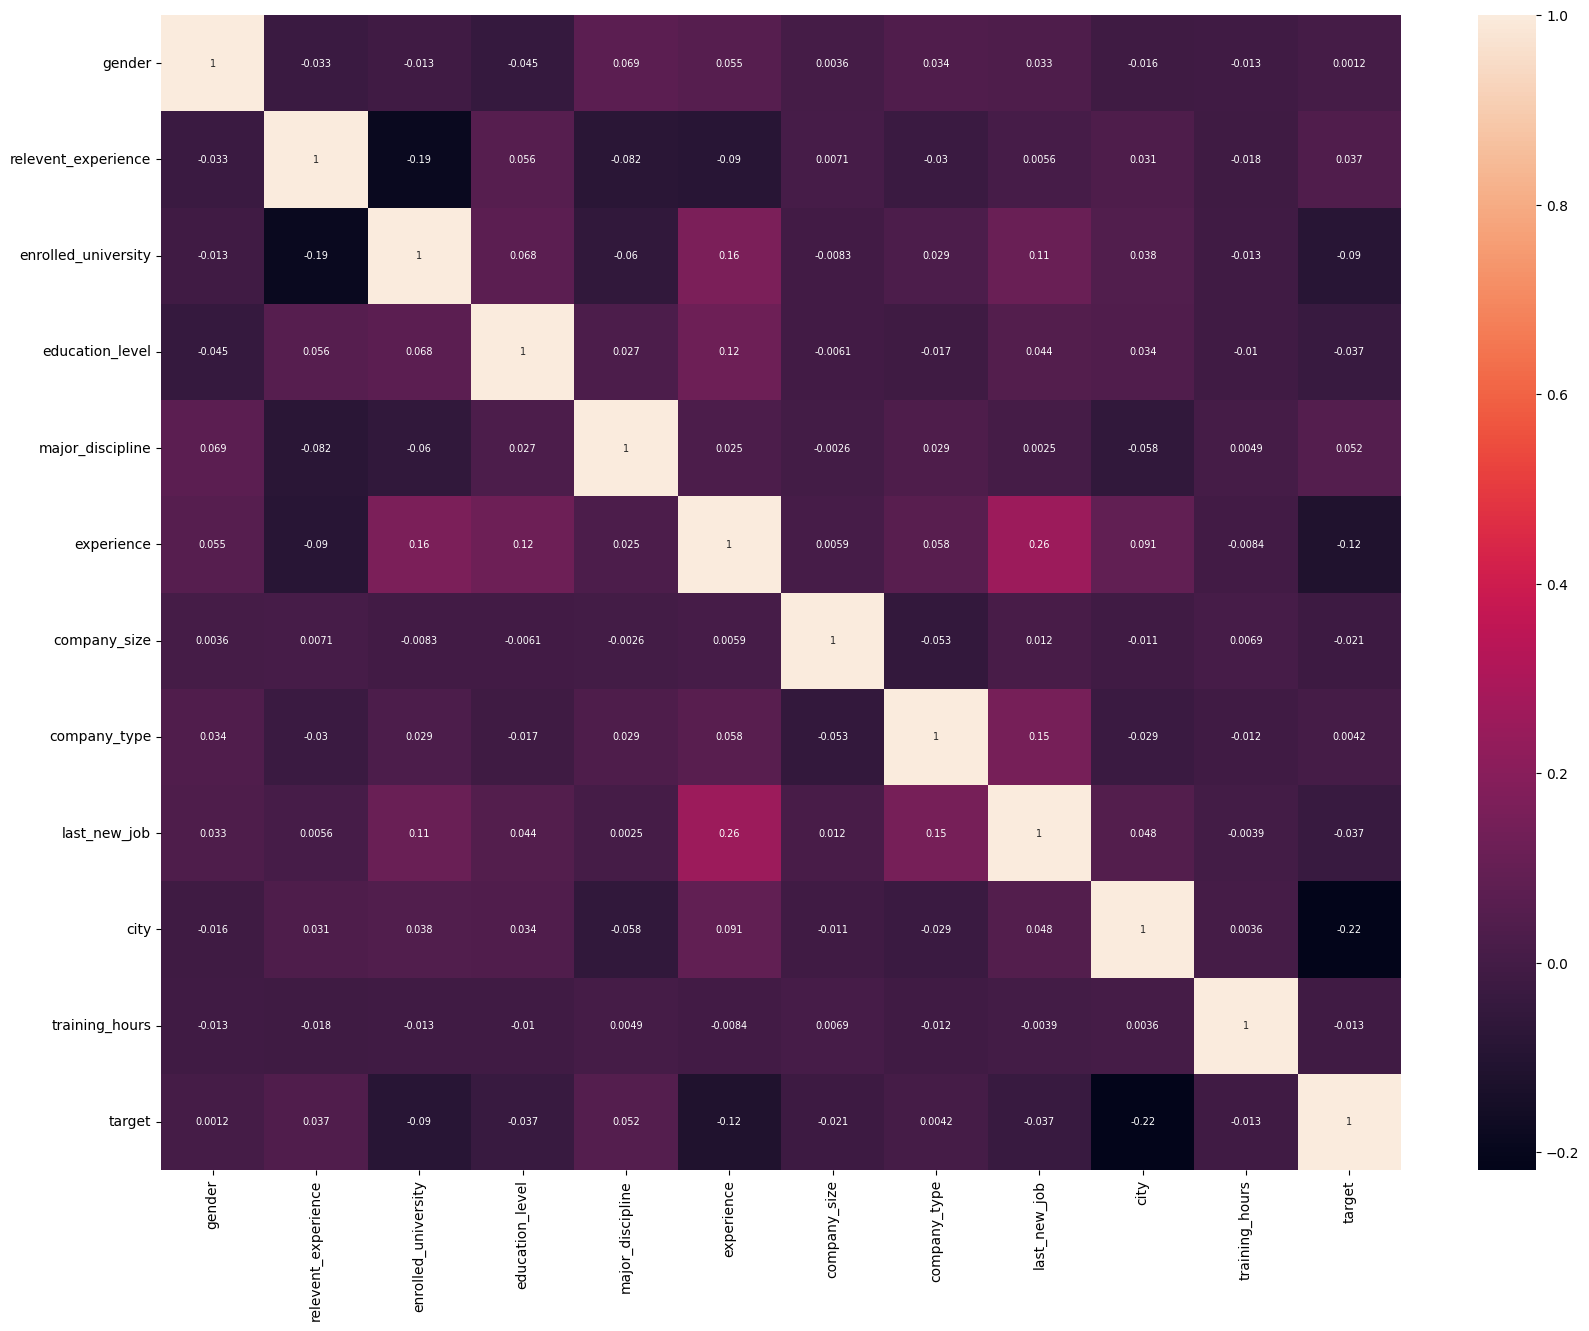

In [691]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_encod.corr(),annot_kws={"size": 7}, annot=True)

In [692]:
#df_encod.corr()['target']
print(df_encod.corr()['target'])

gender                 0.001219
relevent_experience    0.036707
enrolled_university   -0.090202
education_level       -0.036868
major_discipline       0.052459
experience            -0.118051
company_size          -0.021033
company_type           0.004168
last_new_job          -0.036506
city                  -0.218800
training_hours        -0.012674
target                 1.000000
Name: target, dtype: float64


In [693]:
#plt.plot(train_data_OHE.corr()['target'])

In [694]:
#sns.pairplot(train_data_OHE, hue='target')

### Split Train and Validation Set

In [695]:
y = df_encod['target']
X = df_encod.drop('target',axis=1)

In [696]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=1, test_size=0.3)

### Decision Tree baseline

In [697]:
def roc_curve_plot(y_test, y_pred):
    fpr, tpr,_ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [698]:
tree_clf = DecisionTreeClassifier(random_state=17)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [699]:
tree_pred = tree_clf.predict(X_valid)
tree_pred_proba = tree_clf.predict_proba(X_valid)[:,1]

In [700]:
print(classification_report(y_valid, tree_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      2252
         1.0       0.32      0.34      0.33       435

    accuracy                           0.78      2687
   macro avg       0.60      0.60      0.60      2687
weighted avg       0.78      0.78      0.78      2687



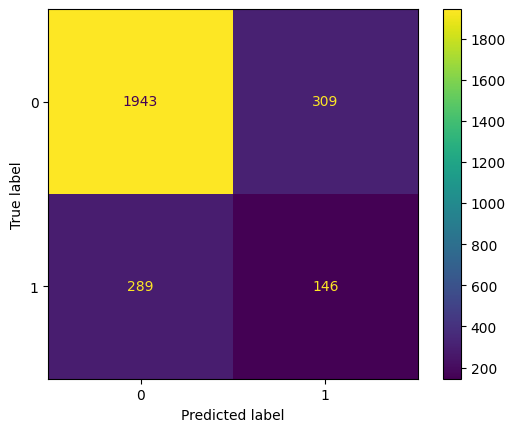

In [701]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_valid, tree_pred)).plot()

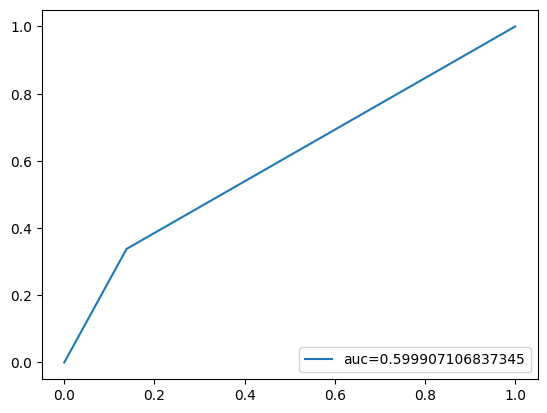

In [702]:
roc_curve_plot(y_valid, tree_pred_proba)

In [703]:
print('Train:', tree_clf.score(X_train, y_train),'\nTest: ',tree_clf.score(X_valid, y_valid))

Train: 0.9979259731971921 
Test:  0.7774469668775587


We see that the model is very much retrained

Learning curve

In [704]:
def plot_learning_curve(estimator, X, y):
    
    train_sizes, train_score, test_score = learning_curve(
    estimator =  estimator,
    X = X,
    y = y, 
    train_sizes = np.linspace(0.01, 1.0, 50), 
    cv = 5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=17) 
    
    mean_train = np.mean(train_score, axis=1)
    mean_test = np.mean(test_score, axis=1)

    plt.plot(train_sizes, mean_train, '--', color="b",  label="Training score")
    plt.plot(train_sizes, mean_test ,color="g", label="Cross-validation score")

    plt.title('learning curve')
    plt.xlabel("size"),
    plt.ylabel("score"),
    plt.legend(loc="best")
    plt.show()

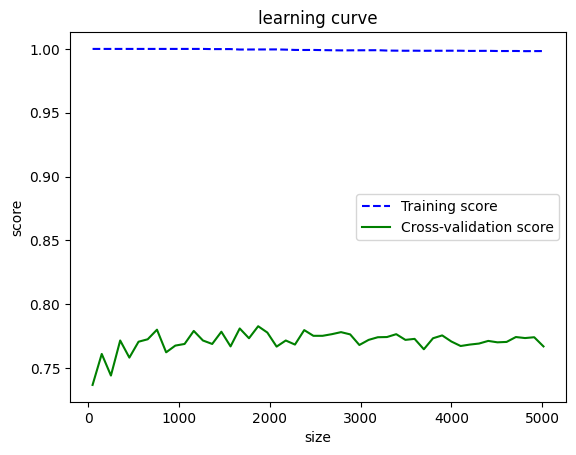

In [705]:
plot_learning_curve(tree_clf, X_train, y_train)

We see a big variation on training and cross-qualification

o begin with, let's try to tuning the hyperparameters of our model

### Hyperparameter Tuning DecisionTree 

In [706]:
tree_param = {'max_depth':range(2,20,2),
             'min_samples_split':range(2, 52, 10),
             'min_samples_leaf':range(2,20,2)
             }
sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [707]:
rs = RandomizedSearchCV(tree_clf, tree_param, cv=sf, random_state=17, n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 2),
                                        'min_samples_leaf': range(2, 20, 2),
                                        'min_samples_split': range(2, 52, 10)},
                   random_state=17, verbose=1)

In [708]:
rs.best_params_
print(rs.best_params_)

{'min_samples_split': 22, 'min_samples_leaf': 16, 'max_depth': 4}


In [709]:
best_tree_param = {'min_samples_split': range(15,28,2),
                   'min_samples_leaf': range(12,21),
                   'max_depth': range(3,7)
                  }

In [710]:
gs = GridSearchCV(tree_clf, best_tree_param, cv=sf, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'min_samples_leaf': range(12, 21),
                         'min_samples_split': range(15, 28, 2)},
             verbose=1)

In [711]:
best_tree = gs.best_estimator_
#gs.best_params_
print(gs.best_params_)

{'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 15}


In [712]:
best_tree_pred = best_tree.predict(X_valid)
best_tree_pred_proba = best_tree.predict_proba(X_valid)[:,1]

[Text(0.5, 0.9, 'city <= 22.0\ngini = 0.278\nsamples = 6268\nvalue = [5220, 1048]\nclass = 1'),
 Text(0.25, 0.7, 'city <= 20.5\ngini = 0.462\nsamples = 1566\nvalue = [999, 567]\nclass = 1'),
 Text(0.125, 0.5, 'city <= 11.5\ngini = 0.203\nsamples = 767\nvalue = [679, 88]\nclass = 1'),
 Text(0.0625, 0.3, 'city <= 10.5\ngini = 0.456\nsamples = 114\nvalue = [74, 40]\nclass = 1'),
 Text(0.03125, 0.1, 'gini = 0.147\nsamples = 50\nvalue = [46, 4]\nclass = 1'),
 Text(0.09375, 0.1, 'gini = 0.492\nsamples = 64\nvalue = [28, 36]\nclass = 0'),
 Text(0.1875, 0.3, 'relevent_experience <= 0.5\ngini = 0.136\nsamples = 653\nvalue = [605, 48]\nclass = 1'),
 Text(0.15625, 0.1, 'gini = 0.113\nsamples = 583\nvalue = [548, 35]\nclass = 1'),
 Text(0.21875, 0.1, 'gini = 0.302\nsamples = 70\nvalue = [57, 13]\nclass = 1'),
 Text(0.375, 0.5, 'training_hours <= 95.5\ngini = 0.48\nsamples = 799\nvalue = [320, 479]\nclass = 0'),
 Text(0.3125, 0.3, 'company_size <= 6.5\ngini = 0.469\nsamples = 617\nvalue = [232, 385

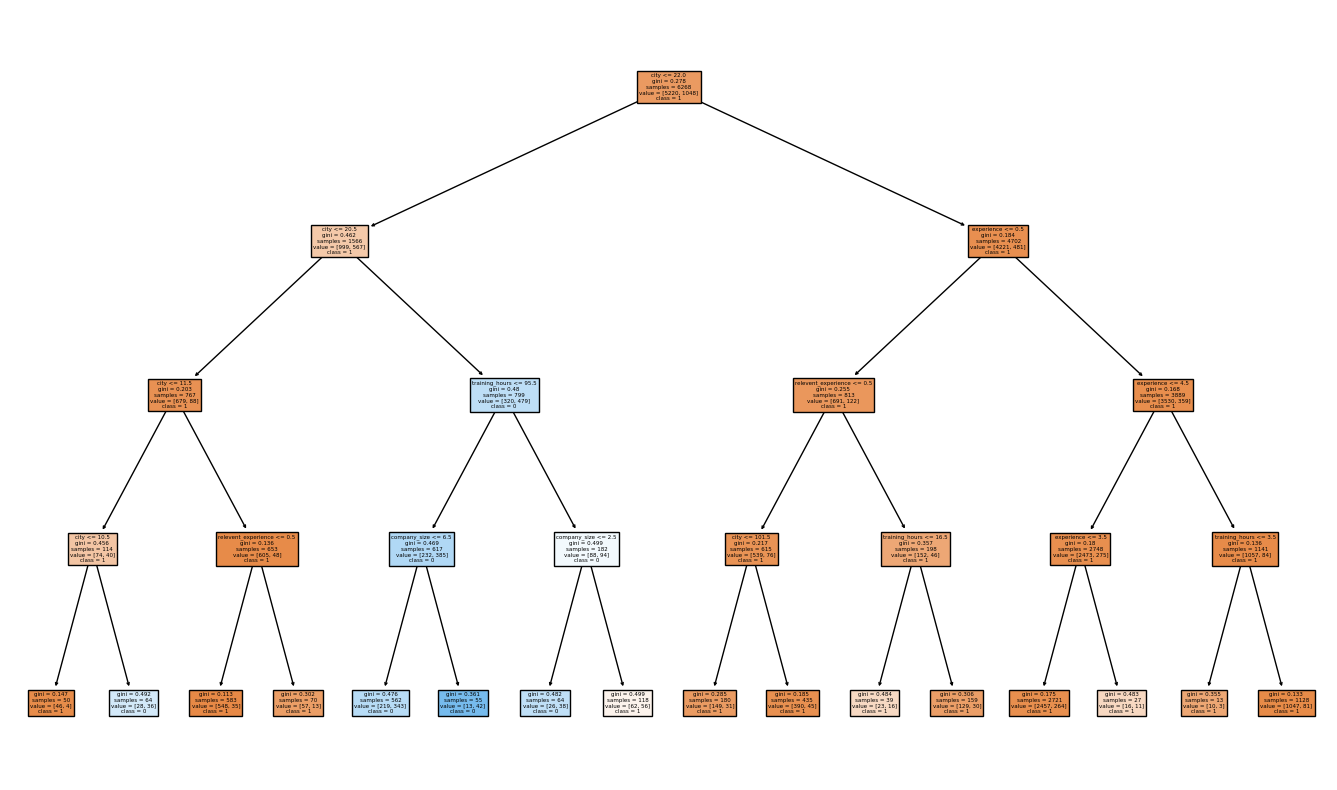

In [713]:
plt.figure(figsize=(17,10))
tree.plot_tree(best_tree, filled=True, class_names=['1','0'], feature_names=X_train.columns)

In [714]:
tree_feature = pd.DataFrame(best_tree.feature_importances_, index=X_train.columns, columns=['result'])
#tree_feature
print(tree_feature)

                       result
gender               0.000000
relevent_experience  0.013845
enrolled_university  0.000000
education_level      0.000000
major_discipline     0.000000
experience           0.027015
company_size         0.008868
company_type         0.000000
last_new_job         0.000000
city                 0.932772
training_hours       0.017500


In [715]:
print('Train:', best_tree.score(X_train, y_train),'\nTest: ',best_tree.score(X_valid, y_valid))

Train: 0.8604020421186982 
Test:  0.8507629326386305


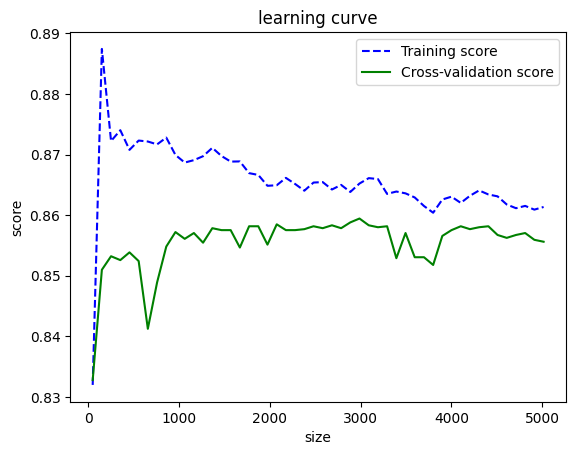

In [716]:
plot_learning_curve(best_tree, X_train, y_train)

overfitting is not visible

In [717]:
print(classification_report(y_valid, best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2252
         1.0       0.56      0.38      0.45       435

    accuracy                           0.85      2687
   macro avg       0.72      0.66      0.68      2687
weighted avg       0.83      0.85      0.84      2687



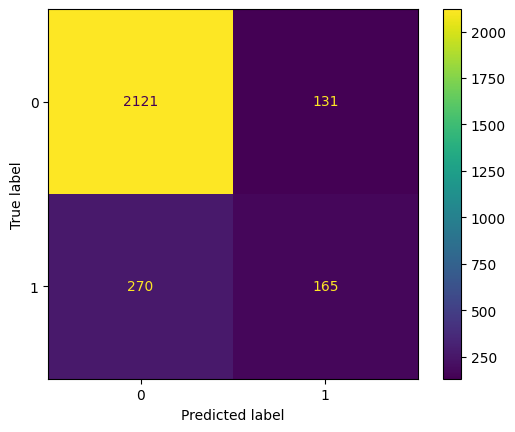

In [718]:
ConfusionMatrixDisplay(confusion_matrix(y_valid, best_tree_pred)).plot()

But we still see a preponderance of class 0, compared to 1

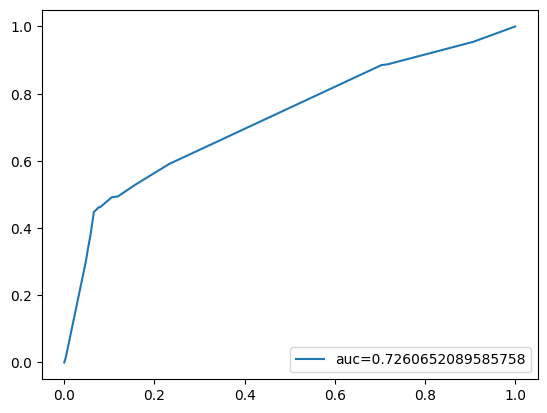

In [719]:
roc_curve_plot(y_valid, best_tree_pred_proba)

Let's try to achieve a balance of classes for a better assessment

## Resampling Unbalanced class

<Axes: xlabel='target', ylabel='count'>

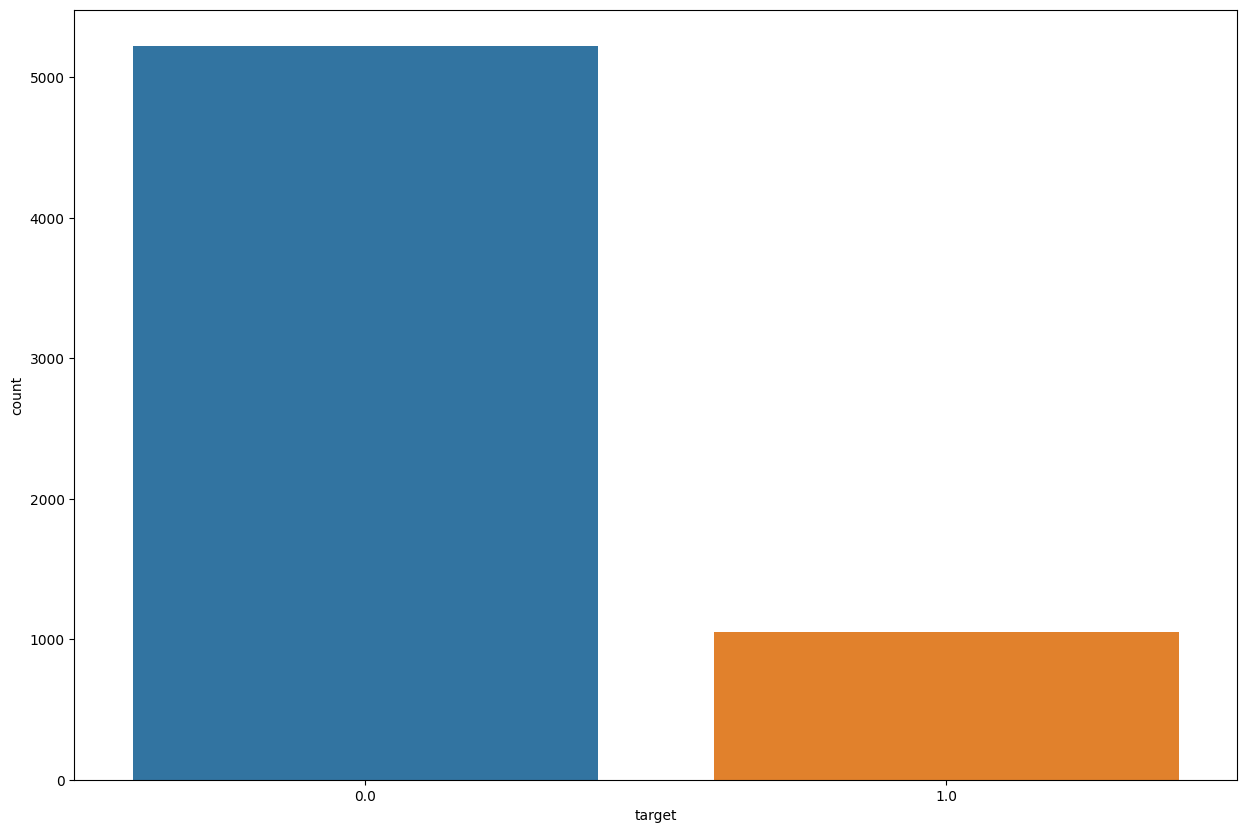

In [720]:
plt.figure(figsize=(15,10))
sns.countplot(x=y_train)

In [721]:
sm =SMOTE(random_state=17)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)
ad = ADASYN(random_state=17)
X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train)

In [722]:
X_train.shape, X_train_sm.shape, X_train_ad.shape
print(X_train.shape, X_train_sm.shape, X_train_ad.shape)

(6268, 11) (10440, 11) (10578, 11)


<Axes: xlabel='target', ylabel='count'>

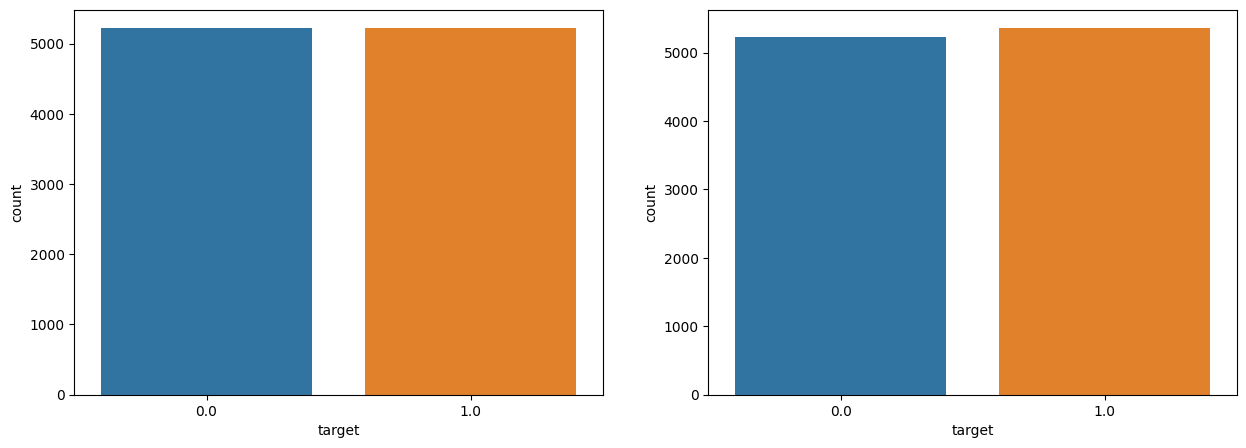

In [723]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(x=y_train_sm, ax=ax[0])
sns.countplot(x=y_train_ad, ax=ax[1])

Now having the same number of classes, let's try to train the model anew, with a new search for the best parameters

SMOTE

In [724]:
sm_gs = GridSearchCV(tree_clf, best_tree_param, cv=sf, n_jobs=-1, verbose=1)
sm_gs.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'min_samples_leaf': range(12, 21),
                         'min_samples_split': range(15, 28, 2)},
             verbose=1)

In [725]:
sm_best_tree = sm_gs.best_estimator_
#sm_gs.best_params_
print(sm_gs.best_params_)

{'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 15}


In [726]:
sm_best_tree_pred = sm_best_tree.predict(X_valid)
sm_best_tree_pred_proba = sm_best_tree.predict_proba(X_valid)[:,1]

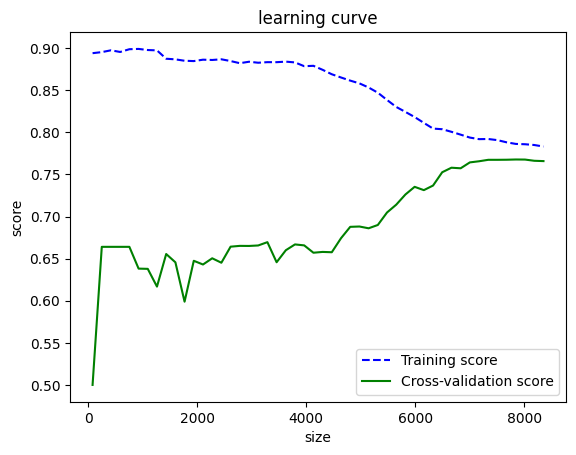

In [727]:
plot_learning_curve(sm_best_tree, X_train_sm, y_train_sm)

In [728]:
print(classification_report(y_valid, best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2252
         1.0       0.56      0.38      0.45       435

    accuracy                           0.85      2687
   macro avg       0.72      0.66      0.68      2687
weighted avg       0.83      0.85      0.84      2687



In [729]:
print(classification_report(y_valid, sm_best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2252
         1.0       0.41      0.50      0.45       435

    accuracy                           0.80      2687
   macro avg       0.66      0.68      0.67      2687
weighted avg       0.82      0.80      0.81      2687



As you can see, recall for class 1 has become higher

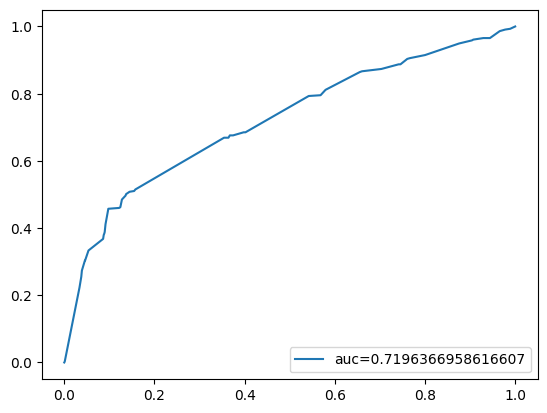

In [730]:
roc_curve_plot(y_valid, sm_best_tree_pred_proba)

ADASYN

In [731]:
ad_gs = GridSearchCV(tree_clf, best_tree_param, cv=sf, n_jobs=-1, verbose=1)
ad_gs.fit(X_train_ad, y_train_ad)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'min_samples_leaf': range(12, 21),
                         'min_samples_split': range(15, 28, 2)},
             verbose=1)

In [732]:
ad_best_tree = ad_gs.best_estimator_
#ad_gs.best_params_
print(ad_gs.best_params_)

{'max_depth': 6, 'min_samples_leaf': 13, 'min_samples_split': 15}


In [733]:
ad_best_tree_pred = ad_best_tree.predict(X_valid)
ad_best_tree_pred_proba = ad_best_tree.predict_proba(X_valid)[:,1]

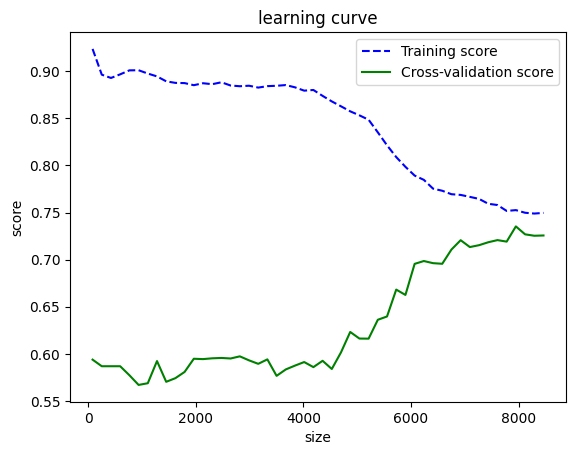

In [734]:
plot_learning_curve(ad_best_tree, X_train_ad, y_train_ad)

In [735]:
print(classification_report(y_valid, best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2252
         1.0       0.56      0.38      0.45       435

    accuracy                           0.85      2687
   macro avg       0.72      0.66      0.68      2687
weighted avg       0.83      0.85      0.84      2687



In [736]:
print(classification_report(y_valid, sm_best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2252
         1.0       0.41      0.50      0.45       435

    accuracy                           0.80      2687
   macro avg       0.66      0.68      0.67      2687
weighted avg       0.82      0.80      0.81      2687



In [737]:
print(classification_report(y_valid, ad_best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2252
         1.0       0.41      0.48      0.44       435

    accuracy                           0.80      2687
   macro avg       0.65      0.67      0.66      2687
weighted avg       0.82      0.80      0.81      2687



ADASAN shows even higher recall results for class 1, but also decreases for class 0

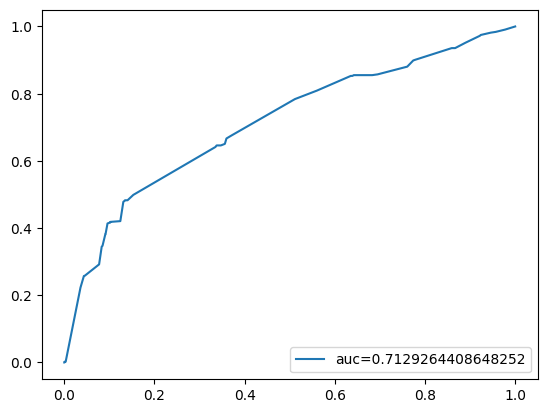

In [738]:
roc_curve_plot(y_valid, ad_best_tree_pred_proba)

Now let's try to use Random forest as the main model

### Random forest

In [739]:
rs = RandomForestClassifier(random_state=17)

I will not use baseline, but will immediately perform hypertuning of the parameters

In [740]:
rs_param = tree_param.copy()
rs_param['n_estimators'] = range(100,2001, 100)
#rs_param
print(rs_param)

{'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 52, 10), 'min_samples_leaf': range(2, 20, 2), 'n_estimators': range(100, 2001, 100)}


In [741]:
rs_rs = RandomizedSearchCV(rs, rs_param, cv=sf, n_jobs=-1, verbose=1, random_state=17)
rs_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                   estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 2),
                                        'min_samples_leaf': range(2, 20, 2),
                                        'min_samples_split': range(2, 52, 10),
                                        'n_estimators': range(100, 2001, 100)},
                   random_state=17, verbose=1)

In [742]:
#rs_rs.best_params_
print(rs_rs.best_params_)

{'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 14}


In [743]:
best_rs = rs_rs.best_estimator_

random forest on GridSearchCV will take a very long time to learn, so I will not run it, we will leave these parameters as the best

In [744]:
rs_pred = best_rs.predict(X_valid)
rs_pred_proba = best_rs.predict_proba(X_valid)[:,1]

In [745]:
rs_feature = pd.DataFrame(best_rs.feature_importances_, index=X_train.columns,
                          columns=['result']).sort_values('result', ascending=False)
#rs_feature
print(rs_feature)

                       result
city                 0.494140
training_hours       0.166034
experience           0.084830
company_size         0.073640
last_new_job         0.054692
company_type         0.032068
enrolled_university  0.025215
education_level      0.023501
major_discipline     0.018271
relevent_experience  0.016454
gender               0.011155


Like Decision Trees, random forest considers city_development_index to be the main variable, but also added weight to the rest of the variables

In [746]:
print('Train:', best_rs.score(X_train, y_train),'\nTest: ',best_rs.score(X_valid, y_valid))

Train: 0.8859285258455648 
Test:  0.8515072571641236


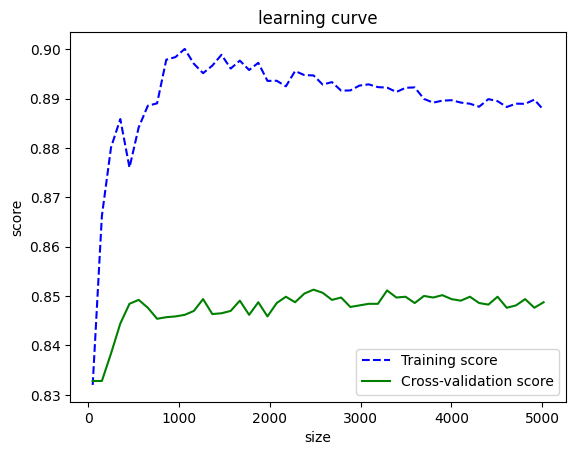

In [747]:
plot_learning_curve(best_rs, X_train, y_train)

We see a big gap between train store and cross score, and we also see that cross continues to grow as the size of the dataset increases

In [748]:
print(classification_report(y_valid, rs_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2252
         1.0       0.58      0.31      0.40       435

    accuracy                           0.85      2687
   macro avg       0.73      0.63      0.66      2687
weighted avg       0.83      0.85      0.83      2687



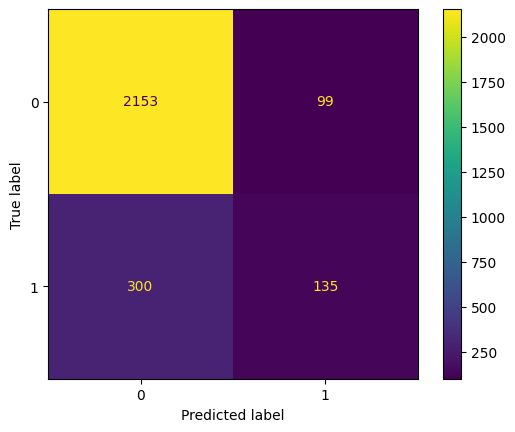

In [749]:
ConfusionMatrixDisplay(confusion_matrix(y_valid, rs_pred)).plot()

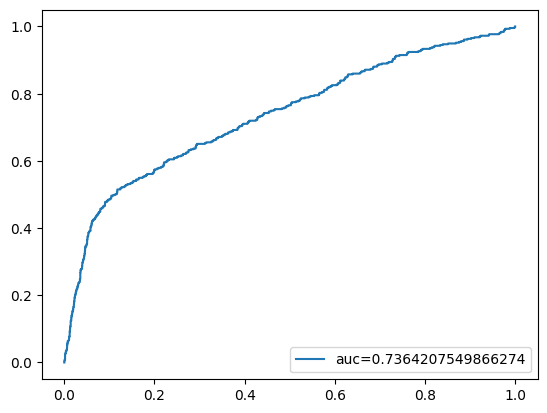

In [750]:
roc_curve_plot(y_valid, rs_pred_proba)

Now let's try to use Resample data on random forest

### Random forest with resample methods

In [751]:
sm_rs = best_rs.fit(X_train_sm, y_train_sm)
ad_rs = best_rs.fit(X_train_sm, y_train_sm)

In [752]:
sm_rs_pred = sm_rs.predict(X_valid)
sm_rs_pred_proba = sm_rs.predict_proba(X_valid)[:,1]

ad_rs_pred = ad_rs.predict(X_valid)
ad_rs_pred_proba = ad_rs.predict_proba(X_valid)[:,1]

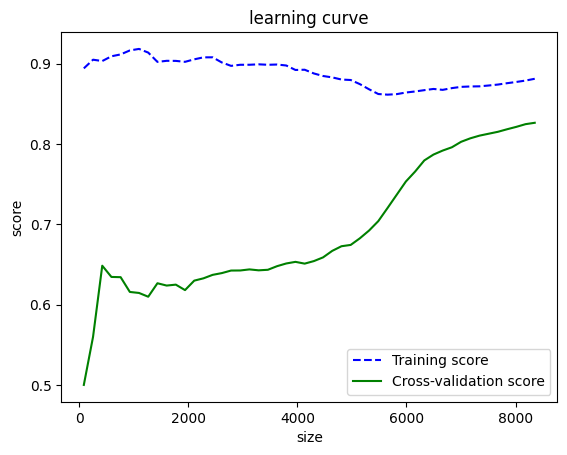

In [753]:
plot_learning_curve(best_rs, X_train_sm, y_train_sm)

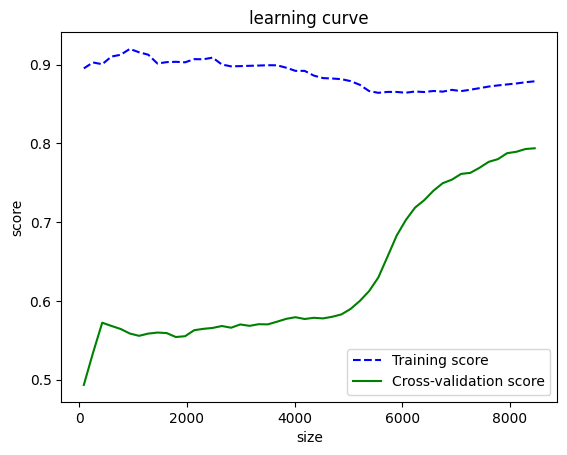

In [754]:
plot_learning_curve(best_rs, X_train_ad, y_train_ad)

In [755]:
print(classification_report(y_valid, sm_rs_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2252
         1.0       0.42      0.49      0.45       435

    accuracy                           0.81      2687
   macro avg       0.66      0.68      0.67      2687
weighted avg       0.82      0.81      0.81      2687



In [756]:
print(classification_report(y_valid, ad_rs_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2252
         1.0       0.42      0.49      0.45       435

    accuracy                           0.81      2687
   macro avg       0.66      0.68      0.67      2687
weighted avg       0.82      0.81      0.81      2687



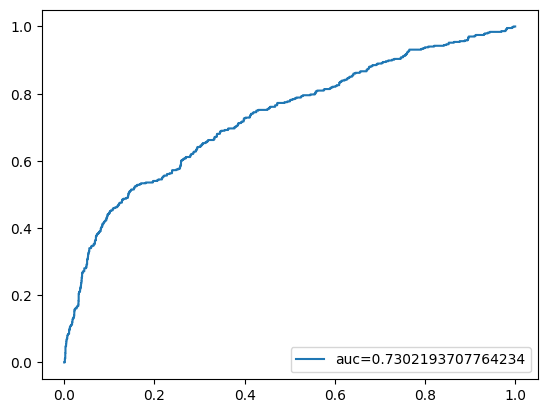

In [757]:
roc_curve_plot(y_valid, sm_rs_pred_proba)

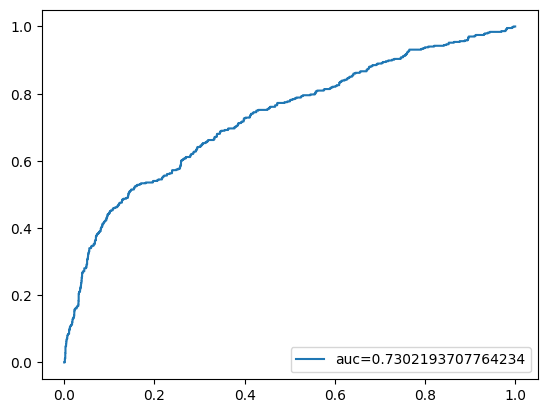

In [758]:
roc_curve_plot(y_valid, ad_rs_pred_proba)

In [759]:
final_result = pd.DataFrame([['Decision Tree', roc_auc_score(y_valid, tree_pred_proba)],
              ['Decision Tree tuning', roc_auc_score(y_valid, best_tree_pred_proba)],
              ['Decision Tree tuning with SMOTE', roc_auc_score(y_valid, sm_best_tree_pred_proba)],
              ['Decision Tree tuning with ADASYN', roc_auc_score(y_valid, ad_best_tree_pred_proba)],
              ['Random forest', roc_auc_score(y_valid, rs_pred_proba)],
              ['Random forest tuning with SMOTE', roc_auc_score(y_valid, sm_rs_pred_proba)],
              ['Random forest tuning with ADASYN', roc_auc_score(y_valid, ad_rs_pred_proba)]],            
             columns=['method', 'result']).sort_values('result', ascending=False)

# Final results

In [760]:
#final_result
print(final_result)

                             method    result
4                     Random forest  0.736421
5   Random forest tuning with SMOTE  0.730219
6  Random forest tuning with ADASYN  0.730219
1              Decision Tree tuning  0.726065
2   Decision Tree tuning with SMOTE  0.719637
3  Decision Tree tuning with ADASYN  0.712926
0                     Decision Tree  0.599907
